In [3]:
from matplotlib.colors import hsv_to_rgb
from mpl_toolkits.mplot3d.axes3d import get_test_data
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from matplotlib import cm
from matplotlib import colors
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mimage
import cv2
from copy import deepcopy
from scipy import ndimage
from skimage import measure,color
from skimage.measure import label, regionprops
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mimage
from PIL import Image
import cv2
import scipy.signal
import os, os.path
from scipy import ndimage
from skimage import measure,color
from skimage.segmentation import find_boundaries
from skimage.morphology import thin, skeletonize, medial_axis
from skimage.measure import label, regionprops
from scipy.spatial import Voronoi
from scipy.spatial import cKDTree
import os
import matplotlib.pyplot as plt
from skimage import data
#from skimage.filters import threshold_otsu, threshold_adaptive
from scipy.spatial import distance
import math
from copy import deepcopy
from scipy.ndimage import gaussian_filter
from skimage import img_as_float
from skimage.morphology import reconstruction

from scipy.signal import argrelextrema
from skimage import data
from skimage.filters.rank import entropy
from skimage.morphology import disk
import timeit

In [50]:
def filter_entropy_image(image, filter):
	
	eimage = entropy(image, disk(3))

	new_picture =  np.ndarray(shape=eimage.shape) #[[False] * image.shape[1]] * image.shape[0]

	for rn, row in enumerate(eimage):
	
		for pn, pixel in enumerate(row):

			if pixel < filter:
				
				new_picture[rn,pn] = True

			else:
				new_picture[rn,pn] = False

	return new_picture.astype('b')

In [52]:
start = timeit.default_timer()
ORO = cv2.imread("/Users/ys2af/HE/AE1222.UMC.HE_x20_z0.macro.png",0)
source = deepcopy(ORO)

ent = entropy(source, disk(3))
stop = timeit.default_timer() 

hist = list(np.histogram(ent,30))

minindex = list(argrelextrema(hist[0], np.less))

for i in range(len(minindex[0])):
    temp_thresh = hist[1][minindex[0][i]]
    if temp_thresh>1 and temp_thresh<4:
        thresh_localminimal = temp_thresh
       
thresh1 = (255*filter_entropy_image(ORO, thresh_localminimal)).astype('uint8')

mask_255 = cv2.bitwise_not(deepcopy(thresh1))


#cv2.imwrite("/Users/ys2af/entropy_method_eval_manual/AE1007.UMC.HE_x20_z0.macro_mask_test3.png", mask_255)
print('Time: ', stop - start) 

Time:  1.1411050900351256


In [53]:
start = timeit.default_timer()
ORO = cv2.imread("/Users/ys2af/HE/AE1222.UMC.HE_x20_z0.macro.png",1)
source = deepcopy(ORO)

source_RGB = cv2.cvtColor(ORO, cv2.COLOR_BGR2RGB)

test_tile_gray = cv2.cvtColor(ORO, cv2.COLOR_BGR2GRAY)

otsu_threshold, image_result = cv2.threshold(test_tile_gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

stop = timeit.default_timer()
print('Time: ', stop - start) 

Time:  0.1982943480834365


In [66]:
import timeit


In [6]:
start = timeit.default_timer()
ORO = cv2.imread("/Users/ys2af/AE1007.UMC.HE/AE1007.UMC.HE_x20_z0.macro.png",0)
source = deepcopy(ORO)

ent = entropy(source, disk(5))

hist = list(np.histogram(ent,30))

minindex = list(argrelextrema(hist[0], np.less))

for i in range(len(minindex[0])):
    temp_thresh = hist[1][minindex[0][i]]
    if temp_thresh>1 and temp_thresh<4:
        thresh_localminimal = temp_thresh
stop = timeit.default_timer()        
thresh1 = (255*filter_entropy_image(ORO, thresh_localminimal)).astype('uint8')

mask_255 = cv2.bitwise_not(deepcopy(thresh1))


cv2.imwrite("/Users/ys2af/AE1007.UMC.HE/AE1007.UMC.HE_x20_z0.macro_mask.png", mask_255)
print('Time: ', stop - start) 

Time:  1.5240906769759022


In [88]:
start = timeit.default_timer()
ORO = cv2.imread("/Users/ys2af/AE1007.UMC.HE/AE1007.UMC.HE_x20_z0.macro.png",1)
source = deepcopy(ORO)

source_RGB = cv2.cvtColor(ORO, cv2.COLOR_BGR2RGB)

test_tile_gray = cv2.cvtColor(ORO, cv2.COLOR_BGR2GRAY)

otsu_threshold, image_result = cv2.threshold(test_tile_gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

stop = timeit.default_timer()
print('Time: ', stop - start) 

Time:  0.0855464159976691


In [54]:

start = timeit.default_timer()
ORO = cv2.imread("/Users/ys2af/AE1007.UMC.HE/AE1007.UMC.HE_x20_z0.macro.png",1)
source = deepcopy(ORO)

source_RGB = cv2.cvtColor(ORO, cv2.COLOR_BGR2RGB)

test_tile_gray = cv2.cvtColor(ORO, cv2.COLOR_BGR2GRAY)

image_result = cv2.adaptiveThreshold(test_tile_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                     cv2.THRESH_BINARY_INV,21,2)

stop = timeit.default_timer()
print('Time: ', stop - start) 

Time:  0.24228084401693195


In [56]:

start = timeit.default_timer()
ORO = cv2.imread("/Users/ys2af/AE1007.UMC.HE/AE1007.UMC.HE_x20_z0.macro.png",1)
source = deepcopy(ORO)

source_RGB = cv2.cvtColor(ORO, cv2.COLOR_BGR2RGB)

test_tile_gray = cv2.cvtColor(ORO, cv2.COLOR_BGR2GRAY)

image_result = cv2.adaptiveThreshold(test_tile_gray,255,cv2.ADAPTIVE_THRESH_MEAN_C,
                                                     cv2.THRESH_BINARY_INV,21,2)

stop = timeit.default_timer()
print('Time: ', stop - start) 

Time:  0.06500709301326424


In [89]:
ORO.shape[0]

1264

In [92]:
a = np.zeros((ORO.shape[0],ORO.shape[1]))
print(a.shape)

(1264, 2000)


In [30]:
component1_pre = cv2.imread("/Users/ys2af/AE1007.UMC.HE/AE1007.UMC.HE_x20_z0.macro_mask.png",0)
component2 = cv2.imread("/Users/ys2af/entropy_method_eval_manual/export/AE1007.UMC.HE_x20_z0.macro_label.png",0)

In [31]:
redolbl = measure.label(np.array(component1_pre),connectivity=2)
redprops = regionprops(redolbl)

redAreaData = []
for r in range(len(redprops)):
    redAreaData.append(redprops[r].area)


max_value = max(redAreaData)
max_index = redAreaData.index(max_value)

component1 = (redolbl==(max_index+1))

component1 = component1/255
component2 = component2/255

component1 = np.array(component1, dtype=bool)
component2 = np.array(component2, dtype=bool)

overlap = component1*component2 # Logical AND
union = component1 + component2 # Logical OR

IOU = overlap.sum()/float(union.sum()) # Treats "True" as 1,
                                       # sums number of Trues
                                       # in overlap and union
                                       # and divides


print('IoU:',IOU)

IoU: 0.9544001984646445


In [119]:
stain = "HE"
directory_groundtruth = "/Users/ys2af/entropy_method_eval_manual/export/" + stain
directory_input = "/Users/ys2af/" + stain
os.makedirs(directory_groundtruth+'/'+'entropy',exist_ok = True)
os.makedirs(directory_groundtruth+'/'+'otsu',exist_ok = True)
os.makedirs(directory_groundtruth+'/'+'slidemask',exist_ok = True)
os.makedirs(directory_groundtruth+'/'+'adaptive',exist_ok = True)

In [60]:
#component2 ground truth
#component1 mask (entropy or otsu or slidemask)

#component2 = cv2.imread(directory_groundtruth + '/' + filename_gt,0)  #os.chdir(path) read ground truth

gt_fn_pieces = []
for filename_gt in os.listdir(directory_groundtruth):
    gt_fn_pieces = filename_gt.split(os.extsep)
    file_id = gt_fn_pieces[0]
    print('file_id:', file_id)
    for filename_ip in os.listdir(directory_input):
        file_find = filename_ip.split(os.extsep)[0]
        print('current file_find:', file_find)
        if file_find == file_id:
            print("found!")
            ORO = cv2.imread(directory_input + '/' + filename_ip,1)
            print('macroimage size:',ORO.shape)
            source = deepcopy(ORO)

            #source_RGB = cv2.cvtColor(ORO, cv2.COLOR_BGR2RGB)

            test_tile_gray = cv2.cvtColor(ORO, cv2.COLOR_BGR2GRAY)

            ent = entropy(test_tile_gray, disk(5))

            hist = list(np.histogram(ent,30))

            minindex = list(argrelextrema(hist[0], np.less))

            for i in range(len(minindex[0])):
                temp_thresh = hist[1][minindex[0][i]]
                if temp_thresh>1 and temp_thresh<4:
                    thresh_localminimal = temp_thresh

            thresh1 = (255*filter_entropy_image(test_tile_gray, thresh_localminimal)).astype('uint8')

            mask_255 = cv2.bitwise_not(deepcopy(thresh1))
            cv2.imwrite(directory_groundtruth+'/entropy/'+ os.path.splitext(filename_ip)[0] +'_wholemask.png',mask_255)
            print(directory_groundtruth+'/entropy/'+ os.path.splitext(filename_ip)[0] +'_wholemask.png--------saved!!!')
            redolbl = measure.label(np.array(mask_255),connectivity=2)
            redprops = regionprops(redolbl)

            redAreaData = []
            for r in range(len(redprops)):
                redAreaData.append(redprops[r].area)


            max_value = max(redAreaData)
            max_index = redAreaData.index(max_value)
            
            max_mask = (redolbl==(max_index+1))*255
            cv2.imwrite(directory_groundtruth+'/entropy/'+ os.path.splitext(filename_ip)[0] +'_entropymask.png', max_mask)
            print(directory_groundtruth+'/entropy/'+ os.path.splitext(filename_ip)[0] +'_entropymask.png-------saved!')
            

file_id: AE1006
current file_find: AE1005
current file_find: AE100
current file_find: AE1006
found!
macroimage size: (784, 408, 3)
/Users/ys2af/entropy_method_eval_manual/export/CD68/entropy/AE1006.CD68.20140617.macro_wholemask.png--------saved!!!
/Users/ys2af/entropy_method_eval_manual/export/CD68/entropy/AE1006.CD68.20140617.macro_entropymask.png-------saved!
current file_find: AE1
current file_find: AE1001
current file_find: AE1013
current file_find: AE1015
current file_find: AE1012
current file_find: AE1011
current file_find: AE1014
current file_find: AE1018
current file_find: AE102
current file_find: AE1017
current file_find: AE1008
current file_find: AE1003
current file_find: AE1016
current file_find: AE1019
current file_find: AE101
current file_find: AE1010
current file_find: AE1004
file_id: AE101
current file_find: AE1005
current file_find: AE100
current file_find: AE1006
current file_find: AE1
current file_find: AE1001
current file_find: AE1013
current file_find: AE1015
curren

/Users/ys2af/entropy_method_eval_manual/export/CD68/entropy/AE1018.CD68.macro_wholemask.png--------saved!!!
/Users/ys2af/entropy_method_eval_manual/export/CD68/entropy/AE1018.CD68.macro_entropymask.png-------saved!
current file_find: AE102
current file_find: AE1017
current file_find: AE1008
current file_find: AE1003
current file_find: AE1016
current file_find: AE1019
current file_find: AE101
current file_find: AE1010
current file_find: AE1004


In [141]:
stain_list = ['HE','FIBRIN','CD34','CD68', 'SR','SMA','GLYCC','EVG']
for stain_name in stain_list:
    directory_groundtruth = "/Users/ys2af/entropy_method_eval_manual/export/" + stain_name
    directory_input = "/Users/ys2af/" + stain_name
    
    os.makedirs(directory_groundtruth+'/'+'adaptive_gaussian',exist_ok = True)
    gt_fn_pieces = []
    for filename_gt in os.listdir(directory_groundtruth):
        gt_fn_pieces = filename_gt.split(os.extsep)
        file_id = gt_fn_pieces[0]
        print('file_id:', file_id)
        for filename_ip in os.listdir(directory_input):
            file_find = filename_ip.split(os.extsep)[0]
            print('current file_find:', file_find)
            if file_find == file_id:
                print("found!")
                ORO = cv2.imread(directory_input + '/' + filename_ip,0)
                print('macroimage size:',ORO.shape)
                image_result = cv2.adaptiveThreshold(ORO,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                                     cv2.THRESH_BINARY_INV,21,2)
                print(image_result.shape)
                cv2.imwrite(directory_groundtruth+'/adaptive_gaussian/'+ os.path.splitext(filename_ip)[0] +'_wholemask.png',image_result)
                print(directory_groundtruth+'/adaptive_gaussian/'+ os.path.splitext(filename_ip)[0] +'_wholemask.png--------saved!!!')
                
                k1 = np.ones((5,5))
                image_result_close = cv2.morphologyEx(image_result, cv2.MORPH_CLOSE, k1)
                

                redolbl = measure.label(np.array(image_result_close),connectivity=2)
                redprops = regionprops(redolbl)

                redAreaData = []
                for r in range(len(redprops)):
                    redAreaData.append(redprops[r].area)


                max_value = max(redAreaData)
                max_index = redAreaData.index(max_value)

                max_mask = (redolbl==(max_index+1))*255
                cv2.imwrite(directory_groundtruth+'/adaptive_gaussian/'+ os.path.splitext(filename_ip)[0] +'_adaptive_gaussianmask.png', max_mask)
                print(directory_groundtruth+'/adaptive_gaussian/'+ os.path.splitext(filename_ip)[0] +'_adaptive_gaussianmask.png-------saved!')
                

file_id: AE1499
current file_find: AE1238
current file_find: AE1498
current file_find: AE1030
current file_find: AE1466
current file_find: AE1469
current file_find: AE1221
current file_find: AE122
current file_find: AE1237
current file_find: AE1230
current file_find: AE1490
current file_find: AE1219
current file_find: AE1227
current file_find: AE1232
current file_find: AE1487
current file_find: AE1221
current file_find: AE1315
current file_find: AE1189
current file_find: AE1381
current file_find: AE1468
current file_find: AE1499
found!
macroimage size: (2000, 1981)
(2000, 1981)
/Users/ys2af/entropy_method_eval_manual/export/HE/adaptive_gaussian/AE1499.UMC.HE_x20_z0.macro_wholemask.png--------saved!!!
/Users/ys2af/entropy_method_eval_manual/export/HE/adaptive_gaussian/AE1499.UMC.HE_x20_z0.macro_adaptive_gaussianmask.png-------saved!
current file_find: AE1239
current file_find: AE1382
current file_find: AE1486
current file_find: AE1217
current file_find: AE1229
current file_find: AE1307


/Users/ys2af/entropy_method_eval_manual/export/HE/adaptive_gaussian/AE1238.UMC.HE_x20_z0.macro_adaptive_gaussianmask.png-------saved!
current file_find: AE1498
current file_find: AE1030
current file_find: AE1466
current file_find: AE1469
current file_find: AE1221
current file_find: AE122
current file_find: AE1237
current file_find: AE1230
current file_find: AE1490
current file_find: AE1219
current file_find: AE1227
current file_find: AE1232
current file_find: AE1487
current file_find: AE1221
current file_find: AE1315
current file_find: AE1189
current file_find: AE1381
current file_find: AE1468
current file_find: AE1499
current file_find: AE1239
current file_find: AE1382
current file_find: AE1486
current file_find: AE1217
current file_find: AE1229
current file_find: AE1307
current file_find: AE1218
current file_find: AE1101
current file_find: AE1473
current file_find: AE1222
current file_find: AE1504
current file_find: AE1007
file_id: AE1007
current file_find: AE1238
current file_find: 

/Users/ys2af/entropy_method_eval_manual/export/HE/adaptive_gaussian/AE1221.HE_x20_z0.macro_adaptive_gaussianmask.png-------saved!
current file_find: AE122
current file_find: AE1237
current file_find: AE1230
current file_find: AE1490
current file_find: AE1219
current file_find: AE1227
current file_find: AE1232
current file_find: AE1487
current file_find: AE1221
found!
macroimage size: (1300, 2000)
(1300, 2000)
/Users/ys2af/entropy_method_eval_manual/export/HE/adaptive_gaussian/AE1221.UMC.HE_x20_z0.macro_wholemask.png--------saved!!!
/Users/ys2af/entropy_method_eval_manual/export/HE/adaptive_gaussian/AE1221.UMC.HE_x20_z0.macro_adaptive_gaussianmask.png-------saved!
current file_find: AE1315
current file_find: AE1189
current file_find: AE1381
current file_find: AE1468
current file_find: AE1499
current file_find: AE1239
current file_find: AE1382
current file_find: AE1486
current file_find: AE1217
current file_find: AE1229
current file_find: AE1307
current file_find: AE1218
current file_fin

macroimage size: (1750, 2000)
(1750, 2000)
/Users/ys2af/entropy_method_eval_manual/export/HE/adaptive_gaussian/AE1466.UMC.HE_x20_z0.macro_wholemask.png--------saved!!!
/Users/ys2af/entropy_method_eval_manual/export/HE/adaptive_gaussian/AE1466.UMC.HE_x20_z0.macro_adaptive_gaussianmask.png-------saved!
current file_find: AE1469
current file_find: AE1221
current file_find: AE122
current file_find: AE1237
current file_find: AE1230
current file_find: AE1490
current file_find: AE1219
current file_find: AE1227
current file_find: AE1232
current file_find: AE1487
current file_find: AE1221
current file_find: AE1315
current file_find: AE1189
current file_find: AE1381
current file_find: AE1468
current file_find: AE1499
current file_find: AE1239
current file_find: AE1382
current file_find: AE1486
current file_find: AE1217
current file_find: AE1229
current file_find: AE1307
current file_find: AE1218
current file_find: AE1101
current file_find: AE1473
current file_find: AE1222
current file_find: AE15

/Users/ys2af/entropy_method_eval_manual/export/FIBRIN/adaptive_gaussian/AE1178.FIBRIN.macro_adaptive_gaussianmask.png-------saved!
current file_find: AE1675
current file_find: AE146
file_id: AE1299
current file_find: AE1299
found!
macroimage size: (2000, 1762)
(2000, 1762)
/Users/ys2af/entropy_method_eval_manual/export/CD34/adaptive_gaussian/AE1299.CD34.macro_wholemask.png--------saved!!!
/Users/ys2af/entropy_method_eval_manual/export/CD34/adaptive_gaussian/AE1299.CD34.macro_adaptive_gaussianmask.png-------saved!
current file_find: AE839
current file_find: AE1675
current file_find: AE2637
current file_find: AE489
current file_find: AE182
current file_find: AE2217
current file_find: AE2173
current file_find: AE2086
current file_find: AE2742
current file_find: AE1354
current file_find: AE2622
current file_find: AE87
file_id: AE2622
current file_find: AE1299
current file_find: AE839
current file_find: AE1675
current file_find: AE2637
current file_find: AE489
current file_find: AE182
curre

/Users/ys2af/entropy_method_eval_manual/export/CD34/adaptive_gaussian/AE2217.CD34.1669.macro_adaptive_gaussianmask.png-------saved!
current file_find: AE2173
current file_find: AE2086
current file_find: AE2742
current file_find: AE1354
current file_find: AE2622
current file_find: AE87
file_id: AE1006
current file_find: AE1005
current file_find: AE100
current file_find: AE1006
found!
macroimage size: (784, 408)
(784, 408)
/Users/ys2af/entropy_method_eval_manual/export/CD68/adaptive_gaussian/AE1006.CD68.20140617.macro_wholemask.png--------saved!!!
/Users/ys2af/entropy_method_eval_manual/export/CD68/adaptive_gaussian/AE1006.CD68.20140617.macro_adaptive_gaussianmask.png-------saved!
current file_find: AE1
current file_find: AE1001
current file_find: AE1013
current file_find: AE1015
current file_find: AE1012
current file_find: AE1011
current file_find: AE1014
current file_find: AE1018
current file_find: AE102
current file_find: AE1017
current file_find: AE1008
current file_find: AE1003
curr

/Users/ys2af/entropy_method_eval_manual/export/CD68/adaptive_gaussian/AE1018.CD68.macro_wholemask.png--------saved!!!
/Users/ys2af/entropy_method_eval_manual/export/CD68/adaptive_gaussian/AE1018.CD68.macro_adaptive_gaussianmask.png-------saved!
current file_find: AE102
current file_find: AE1017
current file_find: AE1008
current file_find: AE1003
current file_find: AE1016
current file_find: AE1019
current file_find: AE101
current file_find: AE1010
current file_find: AE1004
file_id: adaptive_mean
current file_find: AE1005
current file_find: AE100
current file_find: AE1006
current file_find: AE1
current file_find: AE1001
current file_find: AE1013
current file_find: AE1015
current file_find: AE1012
current file_find: AE1011
current file_find: AE1014
current file_find: AE1018
current file_find: AE102
current file_find: AE1017
current file_find: AE1008
current file_find: AE1003
current file_find: AE1016
current file_find: AE1019
current file_find: AE101
current file_find: AE1010
current file

macroimage size: (2000, 1082)
(2000, 1082)
/Users/ys2af/entropy_method_eval_manual/export/SMA/adaptive_gaussian/AE489.SMA.macro_wholemask.png--------saved!!!
/Users/ys2af/entropy_method_eval_manual/export/SMA/adaptive_gaussian/AE489.SMA.macro_adaptive_gaussianmask.png-------saved!
current file_find: AE2217
current file_find: AE87
current file_find: AE2742
current file_find: AE3151
current file_find: AE182
current file_find: AE1675
current file_find: AE1299
current file_find: AE2173
current file_find: AE839
current file_find: AE2637
current file_find: AE1354
file_id: AE2173
current file_find: AE2622
current file_find: AE2086
current file_find: AE489
current file_find: AE2217
current file_find: AE87
current file_find: AE2742
current file_find: AE3151
current file_find: AE182
current file_find: AE1675
current file_find: AE1299
current file_find: AE2173
found!
macroimage size: (1192, 800)
(1192, 800)
/Users/ys2af/entropy_method_eval_manual/export/SMA/adaptive_gaussian/AE2173.SMA.macro_whol

/Users/ys2af/entropy_method_eval_manual/export/GLYCC/adaptive_gaussian/AE3606.GLYCC_x20_z0.macro_adaptive_gaussianmask.png-------saved!
current file_find: AE4022
current file_find: AE4270
current file_find: AE4273
current file_find: AE4274
current file_find: AE4275
current file_find: AE4272
current file_find: AE4278
current file_find: AE4271
current file_find: AE4276
current file_find: AE87
current file_find: AE3884
current file_find: AE3756
file_id: adaptive_gaussian
current file_find: AE4277
current file_find: AE3606
current file_find: AE4022
current file_find: AE4270
current file_find: AE4273
current file_find: AE4274
current file_find: AE4275
current file_find: AE4272
current file_find: AE4278
current file_find: AE4271
current file_find: AE4276
current file_find: AE87
current file_find: AE3884
current file_find: AE3756
file_id: AE4276
current file_find: AE4277
current file_find: AE3606
current file_find: AE4022
current file_find: AE4270
current file_find: AE4273
current file_find: 

/Users/ys2af/entropy_method_eval_manual/export/GLYCC/adaptive_gaussian/AE4274.GLYCC_x20_z0.macro_adaptive_gaussianmask.png-------saved!
current file_find: AE4275
current file_find: AE4272
current file_find: AE4278
current file_find: AE4271
current file_find: AE4276
current file_find: AE87
current file_find: AE3884
current file_find: AE3756
file_id: AE3756
current file_find: AE4277
current file_find: AE3606
current file_find: AE4022
current file_find: AE4270
current file_find: AE4273
current file_find: AE4274
current file_find: AE4275
current file_find: AE4272
current file_find: AE4278
current file_find: AE4271
current file_find: AE4276
current file_find: AE87
current file_find: AE3884
current file_find: AE3756
found!
macroimage size: (1482, 2000)
(1482, 2000)
/Users/ys2af/entropy_method_eval_manual/export/GLYCC/adaptive_gaussian/AE3756.GLYCC_x20_z0.macro_wholemask.png--------saved!!!
/Users/ys2af/entropy_method_eval_manual/export/GLYCC/adaptive_gaussian/AE3756.GLYCC_x20_z0.macro_adapti

/Users/ys2af/entropy_method_eval_manual/export/EVG/adaptive_gaussian/AE87.EVG.macro_adaptive_gaussianmask.png-------saved!
current file_find: AE2217
current file_find: AE489
current file_find: AE3151
current file_find: AE182
current file_find: AE1675
current file_find: AE1299
current file_find: AE2622
current file_find: AE2173
current file_find: AE839
current file_find: AE2637
current file_find: AE1354
current file_find: AE2742
file_id: AE2173
current file_find: AE2086
current file_find: AE87
current file_find: AE2217
current file_find: AE489
current file_find: AE3151
current file_find: AE182
current file_find: AE1675
current file_find: AE1299
current file_find: AE2622
current file_find: AE2173
found!
macroimage size: (1184, 800)
(1184, 800)
/Users/ys2af/entropy_method_eval_manual/export/EVG/adaptive_gaussian/AE2173.EVG.macro_wholemask.png--------saved!!!
/Users/ys2af/entropy_method_eval_manual/export/EVG/adaptive_gaussian/AE2173.EVG.macro_adaptive_gaussianmask.png-------saved!
current

In [139]:
stain_list = ['HE','FIBRIN','CD34','CD68', 'SR','SMA','GLYCC','EVG']
for stain_name in stain_list:
    directory_groundtruth = "/Users/ys2af/entropy_method_eval_manual/export/" + stain_name
    directory_input = "/Users/ys2af/" + stain_name
    
    os.makedirs(directory_groundtruth+'/'+'adaptive_mean',exist_ok = True)
    gt_fn_pieces = []
    for filename_gt in os.listdir(directory_groundtruth):
        gt_fn_pieces = filename_gt.split(os.extsep)
        file_id = gt_fn_pieces[0]
        print('file_id:', file_id)
        for filename_ip in os.listdir(directory_input):
            file_find = filename_ip.split(os.extsep)[0]
            print('current file_find:', file_find)
            if file_find == file_id:
                print("found!")
                ORO = cv2.imread(directory_input + '/' + filename_ip,0)
                print('macroimage size:',ORO.shape)
                image_result = cv2.adaptiveThreshold(ORO,255,cv2.ADAPTIVE_THRESH_MEAN_C,
                                                     cv2.THRESH_BINARY_INV,21,2)
                print(image_result.shape)
                cv2.imwrite(directory_groundtruth+'/adaptive_mean/'+ os.path.splitext(filename_ip)[0] +'_wholemask.png',image_result)
                print(directory_groundtruth+'/adaptive_mean/'+ os.path.splitext(filename_ip)[0] +'_wholemask.png--------saved!!!')
                
                k1 = np.ones((5,5))
                image_result_close = cv2.morphologyEx(image_result, cv2.MORPH_CLOSE, k1)
                

                redolbl = measure.label(np.array(image_result_close),connectivity=2)
                redprops = regionprops(redolbl)

                redAreaData = []
                for r in range(len(redprops)):
                    redAreaData.append(redprops[r].area)


                max_value = max(redAreaData)
                max_index = redAreaData.index(max_value)

                max_mask = (redolbl==(max_index+1))*255
                cv2.imwrite(directory_groundtruth+'/adaptive_mean/'+ os.path.splitext(filename_ip)[0] +'_adaptive_meanmask.png', max_mask)
                print(directory_groundtruth+'/adaptive_mean/'+ os.path.splitext(filename_ip)[0] +'_adaptive_meanmask.png-------saved!')
                

file_id: AE1499
current file_find: AE1238
current file_find: AE1498
current file_find: AE1030
current file_find: AE1466
current file_find: AE1469
current file_find: AE1221
current file_find: AE122
current file_find: AE1237
current file_find: AE1230
current file_find: AE1490
current file_find: AE1219
current file_find: AE1227
current file_find: AE1232
current file_find: AE1487
current file_find: AE1221
current file_find: AE1315
current file_find: AE1189
current file_find: AE1381
current file_find: AE1468
current file_find: AE1499
found!
macroimage size: (2000, 1981)
(2000, 1981)
/Users/ys2af/entropy_method_eval_manual/export/HE/adaptive_mean/AE1499.UMC.HE_x20_z0.macro_wholemask.png--------saved!!!
/Users/ys2af/entropy_method_eval_manual/export/HE/adaptive_mean/AE1499.UMC.HE_x20_z0.macro_adaptive_meanmask.png-------saved!
current file_find: AE1239
current file_find: AE1382
current file_find: AE1486
current file_find: AE1217
current file_find: AE1229
current file_find: AE1307
current file

/Users/ys2af/entropy_method_eval_manual/export/HE/adaptive_mean/AE1238.UMC.HE_x20_z0.macro_adaptive_meanmask.png-------saved!
current file_find: AE1498
current file_find: AE1030
current file_find: AE1466
current file_find: AE1469
current file_find: AE1221
current file_find: AE122
current file_find: AE1237
current file_find: AE1230
current file_find: AE1490
current file_find: AE1219
current file_find: AE1227
current file_find: AE1232
current file_find: AE1487
current file_find: AE1221
current file_find: AE1315
current file_find: AE1189
current file_find: AE1381
current file_find: AE1468
current file_find: AE1499
current file_find: AE1239
current file_find: AE1382
current file_find: AE1486
current file_find: AE1217
current file_find: AE1229
current file_find: AE1307
current file_find: AE1218
current file_find: AE1101
current file_find: AE1473
current file_find: AE1222
current file_find: AE1504
current file_find: AE1007
file_id: AE1007
current file_find: AE1238
current file_find: AE1498
c

/Users/ys2af/entropy_method_eval_manual/export/HE/adaptive_mean/AE1221.HE_x20_z0.macro_adaptive_meanmask.png-------saved!
current file_find: AE122
current file_find: AE1237
current file_find: AE1230
current file_find: AE1490
current file_find: AE1219
current file_find: AE1227
current file_find: AE1232
current file_find: AE1487
current file_find: AE1221
found!
macroimage size: (1300, 2000)
(1300, 2000)
/Users/ys2af/entropy_method_eval_manual/export/HE/adaptive_mean/AE1221.UMC.HE_x20_z0.macro_wholemask.png--------saved!!!
/Users/ys2af/entropy_method_eval_manual/export/HE/adaptive_mean/AE1221.UMC.HE_x20_z0.macro_adaptive_meanmask.png-------saved!
current file_find: AE1315
current file_find: AE1189
current file_find: AE1381
current file_find: AE1468
current file_find: AE1499
current file_find: AE1239
current file_find: AE1382
current file_find: AE1486
current file_find: AE1217
current file_find: AE1229
current file_find: AE1307
current file_find: AE1218
current file_find: AE1101
current fi

macroimage size: (1750, 2000)
(1750, 2000)
/Users/ys2af/entropy_method_eval_manual/export/HE/adaptive_mean/AE1466.UMC.HE_x20_z0.macro_wholemask.png--------saved!!!
/Users/ys2af/entropy_method_eval_manual/export/HE/adaptive_mean/AE1466.UMC.HE_x20_z0.macro_adaptive_meanmask.png-------saved!
current file_find: AE1469
current file_find: AE1221
current file_find: AE122
current file_find: AE1237
current file_find: AE1230
current file_find: AE1490
current file_find: AE1219
current file_find: AE1227
current file_find: AE1232
current file_find: AE1487
current file_find: AE1221
current file_find: AE1315
current file_find: AE1189
current file_find: AE1381
current file_find: AE1468
current file_find: AE1499
current file_find: AE1239
current file_find: AE1382
current file_find: AE1486
current file_find: AE1217
current file_find: AE1229
current file_find: AE1307
current file_find: AE1218
current file_find: AE1101
current file_find: AE1473
current file_find: AE1222
current file_find: AE1504
current f

/Users/ys2af/entropy_method_eval_manual/export/FIBRIN/adaptive_mean/AE1178.FIBRIN.macro_adaptive_meanmask.png-------saved!
current file_find: AE1675
current file_find: AE146
file_id: AE1299
current file_find: AE1299
found!
macroimage size: (2000, 1762)
(2000, 1762)
/Users/ys2af/entropy_method_eval_manual/export/CD34/adaptive_mean/AE1299.CD34.macro_wholemask.png--------saved!!!
/Users/ys2af/entropy_method_eval_manual/export/CD34/adaptive_mean/AE1299.CD34.macro_adaptive_meanmask.png-------saved!
current file_find: AE839
current file_find: AE1675
current file_find: AE2637
current file_find: AE489
current file_find: AE182
current file_find: AE2217
current file_find: AE2173
current file_find: AE2086
current file_find: AE2742
current file_find: AE1354
current file_find: AE2622
current file_find: AE87
file_id: AE2622
current file_find: AE1299
current file_find: AE839
current file_find: AE1675
current file_find: AE2637
current file_find: AE489
current file_find: AE182
current file_find: AE2217

/Users/ys2af/entropy_method_eval_manual/export/CD68/adaptive_mean/AE1006.CD68.20140617.macro_wholemask.png--------saved!!!
/Users/ys2af/entropy_method_eval_manual/export/CD68/adaptive_mean/AE1006.CD68.20140617.macro_adaptive_meanmask.png-------saved!
current file_find: AE1
current file_find: AE1001
current file_find: AE1013
current file_find: AE1015
current file_find: AE1012
current file_find: AE1011
current file_find: AE1014
current file_find: AE1018
current file_find: AE102
current file_find: AE1017
current file_find: AE1008
current file_find: AE1003
current file_find: AE1016
current file_find: AE1019
current file_find: AE101
current file_find: AE1010
current file_find: AE1004
file_id: AE101
current file_find: AE1005
current file_find: AE100
current file_find: AE1006
current file_find: AE1
current file_find: AE1001
current file_find: AE1013
current file_find: AE1015
current file_find: AE1012
current file_find: AE1011
current file_find: AE1014
current file_find: AE1018
current file_fi

/Users/ys2af/entropy_method_eval_manual/export/CD68/adaptive_mean/AE1018.CD68.macro_adaptive_meanmask.png-------saved!
current file_find: AE102
current file_find: AE1017
current file_find: AE1008
current file_find: AE1003
current file_find: AE1016
current file_find: AE1019
current file_find: AE101
current file_find: AE1010
current file_find: AE1004
file_id: adaptive_mean
current file_find: AE1005
current file_find: AE100
current file_find: AE1006
current file_find: AE1
current file_find: AE1001
current file_find: AE1013
current file_find: AE1015
current file_find: AE1012
current file_find: AE1011
current file_find: AE1014
current file_find: AE1018
current file_find: AE102
current file_find: AE1017
current file_find: AE1008
current file_find: AE1003
current file_find: AE1016
current file_find: AE1019
current file_find: AE101
current file_find: AE1010
current file_find: AE1004
file_id: AE2742
current file_find: AE2622
current file_find: AE182
current file_find: AE2086
current file_find: 

/Users/ys2af/entropy_method_eval_manual/export/SMA/adaptive_mean/AE489.SMA.macro_adaptive_meanmask.png-------saved!
current file_find: AE2217
current file_find: AE87
current file_find: AE2742
current file_find: AE3151
current file_find: AE182
current file_find: AE1675
current file_find: AE1299
current file_find: AE2173
current file_find: AE839
current file_find: AE2637
current file_find: AE1354
file_id: AE2173
current file_find: AE2622
current file_find: AE2086
current file_find: AE489
current file_find: AE2217
current file_find: AE87
current file_find: AE2742
current file_find: AE3151
current file_find: AE182
current file_find: AE1675
current file_find: AE1299
current file_find: AE2173
found!
macroimage size: (1192, 800)
(1192, 800)
/Users/ys2af/entropy_method_eval_manual/export/SMA/adaptive_mean/AE2173.SMA.macro_wholemask.png--------saved!!!
/Users/ys2af/entropy_method_eval_manual/export/SMA/adaptive_mean/AE2173.SMA.macro_adaptive_meanmask.png-------saved!
current file_find: AE839
cu

macroimage size: (1750, 2000)
(1750, 2000)
/Users/ys2af/entropy_method_eval_manual/export/GLYCC/adaptive_mean/AE3606.GLYCC_x20_z0.macro_wholemask.png--------saved!!!
/Users/ys2af/entropy_method_eval_manual/export/GLYCC/adaptive_mean/AE3606.GLYCC_x20_z0.macro_adaptive_meanmask.png-------saved!
current file_find: AE4022
current file_find: AE4270
current file_find: AE4273
current file_find: AE4274
current file_find: AE4275
current file_find: AE4272
current file_find: AE4278
current file_find: AE4271
current file_find: AE4276
current file_find: AE87
current file_find: AE3884
current file_find: AE3756
file_id: AE4276
current file_find: AE4277
current file_find: AE3606
current file_find: AE4022
current file_find: AE4270
current file_find: AE4273
current file_find: AE4274
current file_find: AE4275
current file_find: AE4272
current file_find: AE4278
current file_find: AE4271
current file_find: AE4276
found!
macroimage size: (2000, 1728)
(2000, 1728)
/Users/ys2af/entropy_method_eval_manual/expo

/Users/ys2af/entropy_method_eval_manual/export/GLYCC/adaptive_mean/AE4274.GLYCC_x20_z0.macro_adaptive_meanmask.png-------saved!
current file_find: AE4275
current file_find: AE4272
current file_find: AE4278
current file_find: AE4271
current file_find: AE4276
current file_find: AE87
current file_find: AE3884
current file_find: AE3756
file_id: AE3756
current file_find: AE4277
current file_find: AE3606
current file_find: AE4022
current file_find: AE4270
current file_find: AE4273
current file_find: AE4274
current file_find: AE4275
current file_find: AE4272
current file_find: AE4278
current file_find: AE4271
current file_find: AE4276
current file_find: AE87
current file_find: AE3884
current file_find: AE3756
found!
macroimage size: (1482, 2000)
(1482, 2000)
/Users/ys2af/entropy_method_eval_manual/export/GLYCC/adaptive_mean/AE3756.GLYCC_x20_z0.macro_wholemask.png--------saved!!!
/Users/ys2af/entropy_method_eval_manual/export/GLYCC/adaptive_mean/AE3756.GLYCC_x20_z0.macro_adaptive_meanmask.png-

/Users/ys2af/entropy_method_eval_manual/export/EVG/adaptive_mean/AE2637.EVG.891.macro_adaptive_meanmask.png-------saved!
current file_find: AE1354
current file_find: AE2742
file_id: adaptive_mean
current file_find: AE2086
current file_find: AE87
current file_find: AE2217
current file_find: AE489
current file_find: AE3151
current file_find: AE182
current file_find: AE1675
current file_find: AE1299
current file_find: AE2622
current file_find: AE2173
current file_find: AE839
current file_find: AE2637
current file_find: AE1354
current file_find: AE2742
file_id: AE87
current file_find: AE2086
current file_find: AE87
found!
macroimage size: (1080, 832)
(1080, 832)
/Users/ys2af/entropy_method_eval_manual/export/EVG/adaptive_mean/AE87.EVG.macro_wholemask.png--------saved!!!
/Users/ys2af/entropy_method_eval_manual/export/EVG/adaptive_mean/AE87.EVG.macro_adaptive_meanmask.png-------saved!
current file_find: AE2217
current file_find: AE489
current file_find: AE3151
current file_find: AE182
curren

In [64]:
stain_list = ['HE','FIBRIN','CD34','CD68', 'SR','SMA','GLYCC','EVG']
for stain_name in stain_list:
    directory_groundtruth = "/Users/ys2af/entropy_method_eval_manual/export/" + stain_name
    directory_input = "/Users/ys2af/" + stain_name
    gt_fn_pieces = []
    for filename_gt in os.listdir(directory_groundtruth):
        gt_fn_pieces = filename_gt.split(os.extsep)
        file_id = gt_fn_pieces[0]
        print('file_id:', file_id)
        for filename_ip in os.listdir(directory_input):
            file_find = filename_ip.split(os.extsep)[0]
            print('current file_find:', file_find)
            if file_find == file_id:
                print("found!")
                ORO = cv2.imread(directory_input + '/' + filename_ip,0)
                print('macroimage size:',ORO.shape)
                otsu_threshold, image_result = cv2.threshold(ORO, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
                cv2.imwrite(directory_groundtruth+'/otsu/'+ os.path.splitext(filename_ip)[0] +'_wholemask.png',image_result)
                print(directory_groundtruth+'/otsu/'+ os.path.splitext(filename_ip)[0] +'_wholemask.png--------saved!!!')
                

                redolbl = measure.label(np.array(image_result),connectivity=2)
                redprops = regionprops(redolbl)

                redAreaData = []
                for r in range(len(redprops)):
                    redAreaData.append(redprops[r].area)


                max_value = max(redAreaData)
                max_index = redAreaData.index(max_value)

                max_mask = (redolbl==(max_index+1))*255
                cv2.imwrite(directory_groundtruth+'/otsu/'+ os.path.splitext(filename_ip)[0] +'_otsumask.png', max_mask)
                print(directory_groundtruth+'/otsu/'+ os.path.splitext(filename_ip)[0] +'_otsumask.png-------saved!')
                



file_id: AE1499
current file_find: AE1238
current file_find: AE1498
current file_find: AE1030
current file_find: AE1466
current file_find: AE1469
current file_find: AE1221
current file_find: AE122
current file_find: AE1237
current file_find: AE1230
current file_find: AE1490
current file_find: AE1219
current file_find: AE1227
current file_find: AE1232
current file_find: AE1487
current file_find: AE1221
current file_find: AE1315
current file_find: AE1189
current file_find: AE1381
current file_find: AE1468
current file_find: AE1499
found!
macroimage size: (2000, 1981)
/Users/ys2af/entropy_method_eval_manual/export/HE/otsu/AE1499.UMC.HE_x20_z0.macro_wholemask.png--------saved!!!
/Users/ys2af/entropy_method_eval_manual/export/HE/otsu/AE1499.UMC.HE_x20_z0.macro_otsumask.png-------saved!
current file_find: AE1239
current file_find: AE1382
current file_find: AE1486
current file_find: AE1217
current file_find: AE1229
current file_find: AE1307
current file_find: AE1218
current file_find: AE1101


macroimage size: (1264, 2000)
/Users/ys2af/entropy_method_eval_manual/export/HE/otsu/AE1007.UMC.HE_x20_z0.macro_wholemask.png--------saved!!!
/Users/ys2af/entropy_method_eval_manual/export/HE/otsu/AE1007.UMC.HE_x20_z0.macro_otsumask.png-------saved!
file_id: AE1189
current file_find: AE1238
current file_find: AE1498
current file_find: AE1030
current file_find: AE1466
current file_find: AE1469
current file_find: AE1221
current file_find: AE122
current file_find: AE1237
current file_find: AE1230
current file_find: AE1490
current file_find: AE1219
current file_find: AE1227
current file_find: AE1232
current file_find: AE1487
current file_find: AE1221
current file_find: AE1315
current file_find: AE1189
found!
macroimage size: (2000, 1925)
/Users/ys2af/entropy_method_eval_manual/export/HE/otsu/AE1189.UMC.HE_x20_z0.macro_wholemask.png--------saved!!!
/Users/ys2af/entropy_method_eval_manual/export/HE/otsu/AE1189.UMC.HE_x20_z0.macro_otsumask.png-------saved!
current file_find: AE1381
current fi

/Users/ys2af/entropy_method_eval_manual/export/HE/otsu/AE1381.HE_x20_z0.macro_otsumask.png-------saved!
current file_find: AE1468
current file_find: AE1499
current file_find: AE1239
current file_find: AE1382
current file_find: AE1486
current file_find: AE1217
current file_find: AE1229
current file_find: AE1307
current file_find: AE1218
current file_find: AE1101
current file_find: AE1473
current file_find: AE1222
current file_find: AE1504
current file_find: AE1007
file_id: AE1504
current file_find: AE1238
current file_find: AE1498
current file_find: AE1030
current file_find: AE1466
current file_find: AE1469
current file_find: AE1221
current file_find: AE122
current file_find: AE1237
current file_find: AE1230
current file_find: AE1490
current file_find: AE1219
current file_find: AE1227
current file_find: AE1232
current file_find: AE1487
current file_find: AE1221
current file_find: AE1315
current file_find: AE1189
current file_find: AE1381
current file_find: AE1468
current file_find: AE14

/Users/ys2af/entropy_method_eval_manual/export/FIBRIN/otsu/AE99.T02-18575.A.FIBRIN.macro_otsumask.png-------saved!
current file_find: AE1354
current file_find: AE1178
current file_find: AE1675
current file_find: AE146
file_id: entropy
current file_find: AE1299
current file_find: AE489
current file_find: AE87
current file_find: AE182
current file_find: AE260
current file_find: AE99
current file_find: AE1354
current file_find: AE1178
current file_find: AE1675
current file_find: AE146
file_id: AE182
current file_find: AE1299
current file_find: AE489
current file_find: AE87
current file_find: AE182
found!
macroimage size: (896, 896)
/Users/ys2af/entropy_method_eval_manual/export/FIBRIN/otsu/AE182.FIBRIN.macro_wholemask.png--------saved!!!
/Users/ys2af/entropy_method_eval_manual/export/FIBRIN/otsu/AE182.FIBRIN.macro_otsumask.png-------saved!
current file_find: AE260
current file_find: AE99
current file_find: AE1354
current file_find: AE1178
current file_find: AE1675
current file_find: AE146

macroimage size: (712, 864)
/Users/ys2af/entropy_method_eval_manual/export/CD34/otsu/AE1354.CD34.macro_wholemask.png--------saved!!!
/Users/ys2af/entropy_method_eval_manual/export/CD34/otsu/AE1354.CD34.macro_otsumask.png-------saved!
current file_find: AE2622
current file_find: AE87
file_id: AE182
current file_find: AE1299
current file_find: AE839
current file_find: AE1675
current file_find: AE2637
current file_find: AE489
current file_find: AE182
found!
macroimage size: (776, 776)
/Users/ys2af/entropy_method_eval_manual/export/CD34/otsu/AE182.CD34.macro_wholemask.png--------saved!!!
/Users/ys2af/entropy_method_eval_manual/export/CD34/otsu/AE182.CD34.macro_otsumask.png-------saved!
current file_find: AE2217
current file_find: AE2173
current file_find: AE2086
current file_find: AE2742
current file_find: AE1354
current file_find: AE2622
current file_find: AE87
file_id: AE489
current file_find: AE1299
current file_find: AE839
current file_find: AE1675
current file_find: AE2637
current fil

current file_find: AE1005
current file_find: AE100
current file_find: AE1006
current file_find: AE1
current file_find: AE1001
current file_find: AE1013
current file_find: AE1015
current file_find: AE1012
current file_find: AE1011
current file_find: AE1014
current file_find: AE1018
current file_find: AE102
current file_find: AE1017
current file_find: AE1008
current file_find: AE1003
current file_find: AE1016
current file_find: AE1019
current file_find: AE101
current file_find: AE1010
current file_find: AE1004
file_id: AE1001
current file_find: AE1005
current file_find: AE100
current file_find: AE1006
current file_find: AE1
current file_find: AE1001
found!
macroimage size: (2000, 1051)
/Users/ys2af/entropy_method_eval_manual/export/CD68/otsu/AE1001.CD68.macro_wholemask.png--------saved!!!
/Users/ys2af/entropy_method_eval_manual/export/CD68/otsu/AE1001.CD68.macro_otsumask.png-------saved!
current file_find: AE1013
current file_find: AE1015
current file_find: AE1012
current file_find: AE10

/Users/ys2af/entropy_method_eval_manual/export/SMA/otsu/AE489.SMA.macro_otsumask.png-------saved!
current file_find: AE2217
current file_find: AE87
current file_find: AE2742
current file_find: AE3151
current file_find: AE182
current file_find: AE1675
current file_find: AE1299
current file_find: AE2173
current file_find: AE839
current file_find: AE2637
current file_find: AE1354
file_id: AE2173
current file_find: AE2622
current file_find: AE2086
current file_find: AE489
current file_find: AE2217
current file_find: AE87
current file_find: AE2742
current file_find: AE3151
current file_find: AE182
current file_find: AE1675
current file_find: AE1299
current file_find: AE2173
found!
macroimage size: (1192, 800)
/Users/ys2af/entropy_method_eval_manual/export/SMA/otsu/AE2173.SMA.macro_wholemask.png--------saved!!!
/Users/ys2af/entropy_method_eval_manual/export/SMA/otsu/AE2173.SMA.macro_otsumask.png-------saved!
current file_find: AE839
current file_find: AE2637
current file_find: AE1354
file_id

macroimage size: (2000, 1728)
/Users/ys2af/entropy_method_eval_manual/export/GLYCC/otsu/AE4276.GLYCC_x20_z0.macro_wholemask.png--------saved!!!
/Users/ys2af/entropy_method_eval_manual/export/GLYCC/otsu/AE4276.GLYCC_x20_z0.macro_otsumask.png-------saved!
current file_find: AE87
current file_find: AE3884
current file_find: AE3756
file_id: AE3884
current file_find: AE4277
current file_find: AE3606
current file_find: AE4022
current file_find: AE4270
current file_find: AE4273
current file_find: AE4274
current file_find: AE4275
current file_find: AE4272
current file_find: AE4278
current file_find: AE4271
current file_find: AE4276
current file_find: AE87
current file_find: AE3884
found!
macroimage size: (1200, 2000)
/Users/ys2af/entropy_method_eval_manual/export/GLYCC/otsu/AE3884.GLYCC_x20_z0.macro_wholemask.png--------saved!!!
/Users/ys2af/entropy_method_eval_manual/export/GLYCC/otsu/AE3884.GLYCC_x20_z0.macro_otsumask.png-------saved!
current file_find: AE3756
file_id: AE4270
current file_fi

macroimage size: (1536, 1200)
/Users/ys2af/entropy_method_eval_manual/export/EVG/otsu/AE3151.EVG.macro_wholemask.png--------saved!!!
/Users/ys2af/entropy_method_eval_manual/export/EVG/otsu/AE3151.EVG.macro_otsumask.png-------saved!
current file_find: AE182
current file_find: AE1675
current file_find: AE1299
current file_find: AE2622
current file_find: AE2173
current file_find: AE839
current file_find: AE2637
current file_find: AE1354
current file_find: AE2742
file_id: entropy
current file_find: AE2086
current file_find: AE87
current file_find: AE2217
current file_find: AE489
current file_find: AE3151
current file_find: AE182
current file_find: AE1675
current file_find: AE1299
current file_find: AE2622
current file_find: AE2173
current file_find: AE839
current file_find: AE2637
current file_find: AE1354
current file_find: AE2742
file_id: AE1299
current file_find: AE2086
current file_find: AE87
current file_find: AE2217
current file_find: AE489
current file_find: AE3151
current file_find

In [109]:
stain_list = ['HE','FIBRIN','CD34','CD68', 'SR','SMA','GLYCC','EVG']
for stain_name in stain_list:
    directory_groundtruth = "/Users/ys2af/entropy_method_eval_manual/export/" + stain_name
    directory_input = "/Users/ys2af/" + stain_name
    gt_fn_pieces = []
    for filename_gt in os.listdir(directory_groundtruth):
        gt_fn_pieces = filename_gt.split(os.extsep)
        file_id = gt_fn_pieces[0]
        print('file_id:', file_id)
        for filename_ip in os.listdir(directory_input):
            file_find = filename_ip.split(os.extsep)[0]
            print('current file_find:', file_find)
            if file_find == file_id:
                print("found!")
                ORO = cv2.imread(directory_input + '/' + filename_ip,0)
                print('macroimage size:',ORO.shape)
                
                otsu_threshold, image_result = cv2.threshold(ORO, 210,255, cv2.THRESH_BINARY_INV)
#                 mask_temp = np.zeros((ORO.shape[0],ORO.shape[1]))
#                 for n in range(ORO.shape[0]):
#                     for m in range(ORO.shape[1]):
#                         if ORO[n,m]>0 and ORO[n,m]<235:
#                             mask_temp[n,m] = 255
                cv2.imwrite(directory_groundtruth+'/slidemask/'+ os.path.splitext(filename_ip)[0] +'_wholemask.png',image_result)
                print(directory_groundtruth+'/slidemask/'+ os.path.splitext(filename_ip)[0] +'_wholemask.png--------saved!!!')
                

                redolbl = measure.label(np.array(image_result),connectivity=2)
                redprops = regionprops(redolbl)

                redAreaData = []
                for r in range(len(redprops)):
                    redAreaData.append(redprops[r].area)


                max_value = max(redAreaData)
                max_index = redAreaData.index(max_value)

                max_mask = (redolbl==(max_index+1))*255
                cv2.imwrite(directory_groundtruth+'/slidemask/'+ os.path.splitext(filename_ip)[0] +'_slidemask.png', max_mask)
                print(directory_groundtruth+'/slidemask/'+ os.path.splitext(filename_ip)[0] +'_slidemask.png-------saved!')
                
                

file_id: AE1499
current file_find: AE1238
current file_find: AE1498
current file_find: AE1030
current file_find: AE1466
current file_find: AE1469
current file_find: AE1221
current file_find: AE122
current file_find: AE1237
current file_find: AE1230
current file_find: AE1490
current file_find: AE1219
current file_find: AE1227
current file_find: AE1232
current file_find: AE1487
current file_find: AE1221
current file_find: AE1315
current file_find: AE1189
current file_find: AE1381
current file_find: AE1468
current file_find: AE1499
found!
macroimage size: (2000, 1981)
/Users/ys2af/entropy_method_eval_manual/export/HE/slidemask/AE1499.UMC.HE_x20_z0.macro_wholemask.png--------saved!!!
/Users/ys2af/entropy_method_eval_manual/export/HE/slidemask/AE1499.UMC.HE_x20_z0.macro_slidemask.png-------saved!
current file_find: AE1239
current file_find: AE1382
current file_find: AE1486
current file_find: AE1217
current file_find: AE1229
current file_find: AE1307
current file_find: AE1218
current file_fi

/Users/ys2af/entropy_method_eval_manual/export/HE/slidemask/AE1238.UMC.HE_x20_z0.macro_wholemask.png--------saved!!!
/Users/ys2af/entropy_method_eval_manual/export/HE/slidemask/AE1238.UMC.HE_x20_z0.macro_slidemask.png-------saved!
current file_find: AE1498
current file_find: AE1030
current file_find: AE1466
current file_find: AE1469
current file_find: AE1221
current file_find: AE122
current file_find: AE1237
current file_find: AE1230
current file_find: AE1490
current file_find: AE1219
current file_find: AE1227
current file_find: AE1232
current file_find: AE1487
current file_find: AE1221
current file_find: AE1315
current file_find: AE1189
current file_find: AE1381
current file_find: AE1468
current file_find: AE1499
current file_find: AE1239
current file_find: AE1382
current file_find: AE1486
current file_find: AE1217
current file_find: AE1229
current file_find: AE1307
current file_find: AE1218
current file_find: AE1101
current file_find: AE1473
current file_find: AE1222
current file_fin

macroimage size: (1250, 2000)
/Users/ys2af/entropy_method_eval_manual/export/HE/slidemask/AE1381.HE_x20_z0.macro_wholemask.png--------saved!!!
/Users/ys2af/entropy_method_eval_manual/export/HE/slidemask/AE1381.HE_x20_z0.macro_slidemask.png-------saved!
current file_find: AE1468
current file_find: AE1499
current file_find: AE1239
current file_find: AE1382
current file_find: AE1486
current file_find: AE1217
current file_find: AE1229
current file_find: AE1307
current file_find: AE1218
current file_find: AE1101
current file_find: AE1473
current file_find: AE1222
current file_find: AE1504
current file_find: AE1007
file_id: AE1504
current file_find: AE1238
current file_find: AE1498
current file_find: AE1030
current file_find: AE1466
current file_find: AE1469
current file_find: AE1221
current file_find: AE122
current file_find: AE1237
current file_find: AE1230
current file_find: AE1490
current file_find: AE1219
current file_find: AE1227
current file_find: AE1232
current file_find: AE1487
curr

current file_find: AE1299
current file_find: AE489
current file_find: AE87
current file_find: AE182
current file_find: AE260
current file_find: AE99
current file_find: AE1354
current file_find: AE1178
current file_find: AE1675
current file_find: AE146
file_id: AE182
current file_find: AE1299
current file_find: AE489
current file_find: AE87
current file_find: AE182
found!
macroimage size: (896, 896)
/Users/ys2af/entropy_method_eval_manual/export/FIBRIN/slidemask/AE182.FIBRIN.macro_wholemask.png--------saved!!!
/Users/ys2af/entropy_method_eval_manual/export/FIBRIN/slidemask/AE182.FIBRIN.macro_slidemask.png-------saved!
current file_find: AE260
current file_find: AE99
current file_find: AE1354
current file_find: AE1178
current file_find: AE1675
current file_find: AE146
file_id: AE1299
current file_find: AE1299
found!
macroimage size: (1600, 1504)
/Users/ys2af/entropy_method_eval_manual/export/FIBRIN/slidemask/AE1299.FIBRIN.macro_wholemask.png--------saved!!!
/Users/ys2af/entropy_method_ev

/Users/ys2af/entropy_method_eval_manual/export/CD34/slidemask/AE1354.CD34.macro_slidemask.png-------saved!
current file_find: AE2622
current file_find: AE87
file_id: AE182
current file_find: AE1299
current file_find: AE839
current file_find: AE1675
current file_find: AE2637
current file_find: AE489
current file_find: AE182
found!
macroimage size: (776, 776)
/Users/ys2af/entropy_method_eval_manual/export/CD34/slidemask/AE182.CD34.macro_wholemask.png--------saved!!!
/Users/ys2af/entropy_method_eval_manual/export/CD34/slidemask/AE182.CD34.macro_slidemask.png-------saved!
current file_find: AE2217
current file_find: AE2173
current file_find: AE2086
current file_find: AE2742
current file_find: AE1354
current file_find: AE2622
current file_find: AE87
file_id: AE489
current file_find: AE1299
current file_find: AE839
current file_find: AE1675
current file_find: AE2637
current file_find: AE489
found!
macroimage size: (2000, 1016)
/Users/ys2af/entropy_method_eval_manual/export/CD34/slidemask/AE4

macroimage size: (928, 496)
/Users/ys2af/entropy_method_eval_manual/export/CD68/slidemask/AE1016.CD68.macro_wholemask.png--------saved!!!
/Users/ys2af/entropy_method_eval_manual/export/CD68/slidemask/AE1016.CD68.macro_slidemask.png-------saved!
current file_find: AE1019
current file_find: AE101
current file_find: AE1010
current file_find: AE1004
file_id: otsu
current file_find: AE1005
current file_find: AE100
current file_find: AE1006
current file_find: AE1
current file_find: AE1001
current file_find: AE1013
current file_find: AE1015
current file_find: AE1012
current file_find: AE1011
current file_find: AE1014
current file_find: AE1018
current file_find: AE102
current file_find: AE1017
current file_find: AE1008
current file_find: AE1003
current file_find: AE1016
current file_find: AE1019
current file_find: AE101
current file_find: AE1010
current file_find: AE1004
file_id: AE1001
current file_find: AE1005
current file_find: AE100
current file_find: AE1006
current file_find: AE1
current 

/Users/ys2af/entropy_method_eval_manual/export/SMA/slidemask/AE489.SMA.macro_slidemask.png-------saved!
current file_find: AE2217
current file_find: AE87
current file_find: AE2742
current file_find: AE3151
current file_find: AE182
current file_find: AE1675
current file_find: AE1299
current file_find: AE2173
current file_find: AE839
current file_find: AE2637
current file_find: AE1354
file_id: AE2173
current file_find: AE2622
current file_find: AE2086
current file_find: AE489
current file_find: AE2217
current file_find: AE87
current file_find: AE2742
current file_find: AE3151
current file_find: AE182
current file_find: AE1675
current file_find: AE1299
current file_find: AE2173
found!
macroimage size: (1192, 800)
/Users/ys2af/entropy_method_eval_manual/export/SMA/slidemask/AE2173.SMA.macro_wholemask.png--------saved!!!
/Users/ys2af/entropy_method_eval_manual/export/SMA/slidemask/AE2173.SMA.macro_slidemask.png-------saved!
current file_find: AE839
current file_find: AE2637
current file_fin

/Users/ys2af/entropy_method_eval_manual/export/GLYCC/slidemask/AE3606.GLYCC_x20_z0.macro_slidemask.png-------saved!
current file_find: AE4022
current file_find: AE4270
current file_find: AE4273
current file_find: AE4274
current file_find: AE4275
current file_find: AE4272
current file_find: AE4278
current file_find: AE4271
current file_find: AE4276
current file_find: AE87
current file_find: AE3884
current file_find: AE3756
file_id: AE4276
current file_find: AE4277
current file_find: AE3606
current file_find: AE4022
current file_find: AE4270
current file_find: AE4273
current file_find: AE4274
current file_find: AE4275
current file_find: AE4272
current file_find: AE4278
current file_find: AE4271
current file_find: AE4276
found!
macroimage size: (2000, 1728)
/Users/ys2af/entropy_method_eval_manual/export/GLYCC/slidemask/AE4276.GLYCC_x20_z0.macro_wholemask.png--------saved!!!
/Users/ys2af/entropy_method_eval_manual/export/GLYCC/slidemask/AE4276.GLYCC_x20_z0.macro_slidemask.png-------saved!


/Users/ys2af/entropy_method_eval_manual/export/GLYCC/slidemask/AE3756.GLYCC_x20_z0.macro_slidemask.png-------saved!
file_id: AE1675
current file_find: AE2086
current file_find: AE87
current file_find: AE2217
current file_find: AE489
current file_find: AE3151
current file_find: AE182
current file_find: AE1675
found!
macroimage size: (760, 648)
/Users/ys2af/entropy_method_eval_manual/export/EVG/slidemask/AE1675.EVG.macro_wholemask.png--------saved!!!
/Users/ys2af/entropy_method_eval_manual/export/EVG/slidemask/AE1675.EVG.macro_slidemask.png-------saved!
current file_find: AE1299
current file_find: AE2622
current file_find: AE2173
current file_find: AE839
current file_find: AE2637
current file_find: AE1354
current file_find: AE2742
file_id: AE182
current file_find: AE2086
current file_find: AE87
current file_find: AE2217
current file_find: AE489
current file_find: AE3151
current file_find: AE182
found!
macroimage size: (800, 1184)
/Users/ys2af/entropy_method_eval_manual/export/EVG/slidema

macroimage size: (704, 648)
/Users/ys2af/entropy_method_eval_manual/export/EVG/slidemask/AE2622.EVG.947.macro_wholemask.png--------saved!!!
/Users/ys2af/entropy_method_eval_manual/export/EVG/slidemask/AE2622.EVG.947.macro_slidemask.png-------saved!
current file_find: AE2173
current file_find: AE839
current file_find: AE2637
current file_find: AE1354
current file_find: AE2742


In [ ]:
stain = "CD68"
directory_groundtruth = "/Users/ys2af/entropy_method_eval_manual/export/" + stain
directory_input = "/Users/ys2af/" + stain
os.makedirs(directory_groundtruth+'/'+'entropy',exist_ok = True)
os.makedirs(directory_groundtruth+'/'+'otsu',exist_ok = True)
os.makedirs(directory_groundtruth+'/'+'slidemask',exist_ok = True)

In [116]:
stain = "HE"
directory_groundtruth = "/Users/ys2af/entropy_method_eval_manual/export/" + stain
directory_input = "/Users/ys2af/" + stain

gt_fn_pieces = []
img_names = ['image name']
IoU_list = ['IoU']
for filename_gt in os.listdir(directory_groundtruth):
    component2 = cv2.imread(directory_groundtruth + '/' + filename_gt,0)  #os.chdir(path) read ground truth
    gt_fn_pieces = filename_gt.split(os.extsep)
    file_id = gt_fn_pieces[0]
    print('file_id:', file_id)
    for filename_msk in os.listdir(directory_groundtruth+'/entropy'):
        file_find = filename_msk.split(os.extsep)[0]
        file_suffix = filename_msk.split(os.extsep)[-2]
        print('current file_find:', file_find)
        if file_find == file_id and file_suffix == 'macro_entropymask':
            component1 = cv2.imread(directory_groundtruth+'/entropy/'+filename_msk,0)
            
            component1 = component1/255
            component2 = component2/255

            component1 = np.array(component1, dtype=bool)
            component2 = np.array(component2, dtype=bool)

            overlap = component1*component2 # Logical AND
            union = component1 + component2 # Logical OR

            IOU = overlap.sum()/float(union.sum())
            
            img_names.append(filename_msk.split(os.extsep)[0]+'.'+ filename_msk.split(os.extsep)[1])
            
            IoU_list.append(IOU)
            np.savetxt(directory_groundtruth+'/'+stain+'_entropy_evaluation.csv', [p for p in zip(img_names, IoU_list)], delimiter='\t', fmt='%s')



file_id: AE1499
current file_find: AE1382
current file_find: AE1238
current file_find: AE1237
current file_find: AE1217
current file_find: AE1468
current file_find: AE1381
current file_find: AE1473
current file_find: AE1230
current file_find: AE1490
current file_find: AE1221
current file_find: AE1227
current file_find: AE1222
current file_find: AE1222
current file_find: AE1381
current file_find: AE1466
current file_find: AE1466
current file_find: AE1221
current file_find: AE1030
current file_find: AE1229
current file_find: AE1229
current file_find: AE1238
current file_find: AE1490
current file_find: AE1101
current file_find: AE1473
current file_find: AE1221
current file_find: AE1227
current file_find: AE1189
current file_find: AE1007
current file_find: AE1030
current file_find: AE1189
current file_find: AE1230
current file_find: AE1221
current file_find: AE1101
current file_find: AE1504
current file_find: AE1007
current file_find: AE1499
current file_find: AE1237
current file_find: AE1

current file_find: AE1237
current file_find: AE1217
current file_find: AE1468
current file_find: AE1381
current file_find: AE1473
current file_find: AE1230
current file_find: AE1490
current file_find: AE1221
current file_find: AE1227
current file_find: AE1222
current file_find: AE1222
current file_find: AE1381
current file_find: AE1466
current file_find: AE1466
current file_find: AE1221
current file_find: AE1030
current file_find: AE1229
current file_find: AE1229
current file_find: AE1238
current file_find: AE1490
current file_find: AE1101
current file_find: AE1473
current file_find: AE1221
current file_find: AE1227
current file_find: AE1189
current file_find: AE1007
current file_find: AE1030
current file_find: AE1189
current file_find: AE1230
current file_find: AE1221
current file_find: AE1101
current file_find: AE1504
current file_find: AE1007
current file_find: AE1499
current file_find: AE1237
current file_find: AE1499
current file_find: AE1468
current file_find: AE1217
current file

ValueError: operands could not be broadcast together with shapes (1750,2000) (2000,1750) 

In [117]:
stain = "HE"
directory_groundtruth = "/Users/ys2af/entropy_method_eval_manual/export/" + stain
directory_input = "/Users/ys2af/" + stain

gt_fn_pieces = []
img_names = ['image name']
IoU_list = ['IoU']
for filename_gt in os.listdir(directory_groundtruth):
    component2 = cv2.imread(directory_groundtruth + '/' + filename_gt,0)  #os.chdir(path) read ground truth
    gt_fn_pieces = filename_gt.split(os.extsep)
    file_id = gt_fn_pieces[0]
    print('file_id:', file_id)
    for filename_msk in os.listdir(directory_groundtruth+'/otsu'):
        file_find = filename_msk.split(os.extsep)[0]
        file_suffix = filename_msk.split(os.extsep)[-2]
        print('current file_find:', file_find)
        if file_find == file_id and file_suffix == 'macro_otsumask':
            component1 = cv2.imread(directory_groundtruth+'/otsu/'+filename_msk,0)
            
            component1 = component1/255
            component2 = component2/255

            component1 = np.array(component1, dtype=bool)
            component2 = np.array(component2, dtype=bool)

            overlap = component1*component2 # Logical AND
            union = component1 + component2 # Logical OR

            IOU = overlap.sum()/float(union.sum())
            
            img_names.append(filename_msk.split(os.extsep)[0]+'.'+ filename_msk.split(os.extsep)[1])
            
            IoU_list.append(IOU)
            np.savetxt(directory_groundtruth+'/'+stain+'_otsu_evaluation.csv', [p for p in zip(img_names, IoU_list)], delimiter='\t', fmt='%s')


file_id: AE1499
current file_find: AE1468
current file_find: AE1007
current file_find: AE1030
current file_find: AE1217
current file_find: AE1468
current file_find: AE1490
current file_find: AE1473
current file_find: AE1381
current file_find: AE1222
current file_find: AE1189
current file_find: AE1101
current file_find: AE1230
current file_find: AE1490
current file_find: AE1221
current file_find: AE1229
current file_find: AE1222
current file_find: AE1221
current file_find: AE1237
current file_find: AE1466
current file_find: AE1221
current file_find: AE1230
current file_find: AE1499
current file_find: AE1030
current file_find: AE1504
current file_find: AE1381
current file_find: AE1229
current file_find: AE1382
current file_find: AE1238
current file_find: AE1227
current file_find: AE1101
current file_find: AE1238
current file_find: AE1473
current file_find: AE1217
current file_find: AE1227
current file_find: AE1189
current file_find: AE1221
current file_find: AE1007
current file_find: AE1

current file_find: AE1101
current file_find: AE1230
current file_find: AE1490
current file_find: AE1221
current file_find: AE1229
current file_find: AE1222
current file_find: AE1221
current file_find: AE1237
current file_find: AE1466
current file_find: AE1221
current file_find: AE1230
current file_find: AE1499
current file_find: AE1030
current file_find: AE1504
current file_find: AE1381
current file_find: AE1229
current file_find: AE1382
current file_find: AE1238
current file_find: AE1227
current file_find: AE1101
current file_find: AE1238
current file_find: AE1473
current file_find: AE1217
current file_find: AE1227
current file_find: AE1189
current file_find: AE1221
current file_find: AE1007
current file_find: AE1499
current file_find: AE1237
current file_find: AE1466
current file_find: AE1382
current file_find: AE1504
file_id: entropy
current file_find: AE1468
current file_find: AE1007
current file_find: AE1030
current file_find: AE1217
current file_find: AE1468
current file_find: AE

ValueError: operands could not be broadcast together with shapes (1750,2000) (2000,1750) 

In [118]:
stain = "HE"
directory_groundtruth = "/Users/ys2af/entropy_method_eval_manual/export/" + stain
directory_input = "/Users/ys2af/" + stain

gt_fn_pieces = []
img_names = ['image name']
IoU_list = ['IoU']
for filename_gt in os.listdir(directory_groundtruth):
    component2 = cv2.imread(directory_groundtruth + '/' + filename_gt,0)  #os.chdir(path) read ground truth
    gt_fn_pieces = filename_gt.split(os.extsep)
    file_id = gt_fn_pieces[0]
    print('file_id:', file_id)
    for filename_msk in os.listdir(directory_groundtruth+'/slidemask'):
        file_find = filename_msk.split(os.extsep)[0]
        file_suffix = filename_msk.split(os.extsep)[-2]
        print('current file_find:', file_find)
        if file_find == file_id and file_suffix == 'macro_slidemask':
            component1 = cv2.imread(directory_groundtruth+'/slidemask/'+filename_msk,0)
            
            component1 = component1/255
            component2 = component2/255

            component1 = np.array(component1, dtype=bool)
            component2 = np.array(component2, dtype=bool)

            overlap = component1*component2 # Logical AND
            union = component1 + component2 # Logical OR

            IOU = overlap.sum()/float(union.sum())
            
            img_names.append(filename_msk.split(os.extsep)[0]+'.'+ filename_msk.split(os.extsep)[1])
            
            IoU_list.append(IOU)
            np.savetxt(directory_groundtruth+'/'+stain+'_slidemask_evaluation.csv', [p for p in zip(img_names, IoU_list)], delimiter='\t', fmt='%s')

file_id: AE1499
current file_find: AE1030
current file_find: AE1217
current file_find: AE1468
current file_find: AE1381
current file_find: AE1101
current file_find: AE1473
current file_find: AE1230
current file_find: AE1229
current file_find: AE1490
current file_find: AE1221
current file_find: AE1238
current file_find: AE1222
current file_find: AE1221
current file_find: AE1227
current file_find: AE1189
current file_find: AE1382
current file_find: AE1504
current file_find: AE1466
current file_find: AE1007
current file_find: AE1499
current file_find: AE1237
current file_find: AE1468
current file_find: AE1381
current file_find: AE1030
current file_find: AE1217
current file_find: AE1230
current file_find: AE1490
current file_find: AE1229
current file_find: AE1221
current file_find: AE1238
current file_find: AE1101
current file_find: AE1473
current file_find: AE1227
current file_find: AE1189
current file_find: AE1222
current file_find: AE1221
current file_find: AE1466
current file_find: AE1

current file_find: AE1382
current file_find: AE1504
current file_find: AE1466
current file_find: AE1007
current file_find: AE1499
current file_find: AE1237
current file_find: AE1468
current file_find: AE1381
current file_find: AE1030
current file_find: AE1217
current file_find: AE1230
current file_find: AE1490
current file_find: AE1229
current file_find: AE1221
current file_find: AE1238
current file_find: AE1101
current file_find: AE1473
current file_find: AE1227
current file_find: AE1189
current file_find: AE1222
current file_find: AE1221
current file_find: AE1466
current file_find: AE1007
current file_find: AE1499
current file_find: AE1237
current file_find: AE1382
current file_find: AE1504
file_id: entropy
current file_find: AE1030
current file_find: AE1217
current file_find: AE1468
current file_find: AE1381
current file_find: AE1101
current file_find: AE1473
current file_find: AE1230
current file_find: AE1229
current file_find: AE1490
current file_find: AE1221
current file_find: AE

ValueError: operands could not be broadcast together with shapes (1750,2000) (2000,1750) 

In [143]:
stain = "HE"
directory_groundtruth = "/Users/ys2af/entropy_method_eval_manual/export/" + stain
directory_input = "/Users/ys2af/" + stain

gt_fn_pieces = []
img_names = ['image name']
IoU_list = ['IoU']
for filename_gt in os.listdir(directory_groundtruth):
    component2 = cv2.imread(directory_groundtruth + '/' + filename_gt,0)  #os.chdir(path) read ground truth
    gt_fn_pieces = filename_gt.split(os.extsep)
    file_id = gt_fn_pieces[0]
    print('file_id:', file_id)
    for filename_msk in os.listdir(directory_groundtruth+'/adaptive_mean'):
        file_find = filename_msk.split(os.extsep)[0]
        file_suffix = filename_msk.split(os.extsep)[-2]
        print('current file_find:', file_find)
        if file_find == file_id and file_suffix == 'macro_adaptive_meanmask':
            component1 = cv2.imread(directory_groundtruth+'/adaptive_mean/'+filename_msk,0)
            
            component1 = component1/255
            component2 = component2/255

            component1 = np.array(component1, dtype=bool)
            component2 = np.array(component2, dtype=bool)

            overlap = component1*component2 # Logical AND
            union = component1 + component2 # Logical OR

            IOU = overlap.sum()/float(union.sum())
            
            img_names.append(filename_msk.split(os.extsep)[0]+'.'+ filename_msk.split(os.extsep)[1])
            
            IoU_list.append(IOU)
            np.savetxt(directory_groundtruth+'/'+stain+'_adaptive_mean_evaluation.csv', [p for p in zip(img_names, IoU_list)], delimiter='\t', fmt='%s')

file_id: AE1499
current file_find: AE1101
current file_find: AE1217
current file_find: AE1221
current file_find: AE1468
current file_find: AE1468
current file_find: AE1007
current file_find: AE1381
current file_find: 
current file_find: AE1230
current file_find: AE1490
current file_find: AE1221
current file_find: AE1222
current file_find: AE1466
current file_find: AE1030
current file_find: AE1381
current file_find: AE1222
current file_find: AE1382
current file_find: AE1466
current file_find: AE1217
current file_find: AE1230
current file_find: AE1030
current file_find: AE1504
current file_find: AE1229
current file_find: AE1499
current file_find: AE1238
current file_find: AE1229
current file_find: AE1473
current file_find: AE1101
current file_find: AE1473
current file_find: AE1221
current file_find: AE1227
current file_find: AE1189
current file_find: AE1490
current file_find: AE1221
current file_find: AE1007
current file_find: AE1499
current file_find: AE1237
current file_find: AE1238
cu

current file_find: AE1227
current file_find: AE1382
current file_find: AE1237
current file_find: AE1504
file_id: entropy
current file_find: AE1101
current file_find: AE1217
current file_find: AE1221
current file_find: AE1468
current file_find: AE1468
current file_find: AE1007
current file_find: AE1381
current file_find: 
current file_find: AE1230
current file_find: AE1490
current file_find: AE1221
current file_find: AE1222
current file_find: AE1466
current file_find: AE1030
current file_find: AE1381
current file_find: AE1222
current file_find: AE1382
current file_find: AE1466
current file_find: AE1217
current file_find: AE1230
current file_find: AE1030
current file_find: AE1504
current file_find: AE1229
current file_find: AE1499
current file_find: AE1238
current file_find: AE1229
current file_find: AE1473
current file_find: AE1101
current file_find: AE1473
current file_find: AE1221
current file_find: AE1227
current file_find: AE1189
current file_find: AE1490
current file_find: AE1221
c

ValueError: operands could not be broadcast together with shapes (1750,2000) (2000,1750) 

In [144]:
stain = "HE"
directory_groundtruth = "/Users/ys2af/entropy_method_eval_manual/export/" + stain
directory_input = "/Users/ys2af/" + stain

gt_fn_pieces = []
img_names = ['image name']
IoU_list = ['IoU']
for filename_gt in os.listdir(directory_groundtruth):
    component2 = cv2.imread(directory_groundtruth + '/' + filename_gt,0)  #os.chdir(path) read ground truth
    gt_fn_pieces = filename_gt.split(os.extsep)
    file_id = gt_fn_pieces[0]
    print('file_id:', file_id)
    for filename_msk in os.listdir(directory_groundtruth+'/adaptive_gaussian'):
        file_find = filename_msk.split(os.extsep)[0]
        file_suffix = filename_msk.split(os.extsep)[-2]
        print('current file_find:', file_find)
        if file_find == file_id and file_suffix == 'macro_adaptive_gaussianmask':
            component1 = cv2.imread(directory_groundtruth+'/adaptive_gaussian/'+filename_msk,0)
            
            component1 = component1/255
            component2 = component2/255

            component1 = np.array(component1, dtype=bool)
            component2 = np.array(component2, dtype=bool)

            overlap = component1*component2 # Logical AND
            union = component1 + component2 # Logical OR

            IOU = overlap.sum()/float(union.sum())
            
            img_names.append(filename_msk.split(os.extsep)[0]+'.'+ filename_msk.split(os.extsep)[1])
            
            IoU_list.append(IOU)
            np.savetxt(directory_groundtruth+'/'+stain+'_adaptive_gaussian_evaluation.csv', [p for p in zip(img_names, IoU_list)], delimiter='\t', fmt='%s')

file_id: AE1499
current file_find: AE1221
current file_find: AE1189
current file_find: AE1504
current file_find: AE1217
current file_find: AE1468
current file_find: AE1382
current file_find: AE1381
current file_find: AE1030
current file_find: AE1230
current file_find: AE1490
current file_find: AE1221
current file_find: AE1229
current file_find: AE1007
current file_find: AE1222
current file_find: AE1101
current file_find: AE1230
current file_find: AE1466
current file_find: AE1237
current file_find: AE1227
current file_find: AE1490
current file_find: AE1468
current file_find: AE1381
current file_find: AE1030
current file_find: AE1473
current file_find: AE1221
current file_find: AE1229
current file_find: AE1238
current file_find: AE1101
current file_find: AE1473
current file_find: AE1466
current file_find: AE1499
current file_find: AE1222
current file_find: AE1227
current file_find: AE1189
current file_find: AE1221
current file_find: AE1007
current file_find: AE1499
current file_find: AE1

file_id: AE1238
current file_find: AE1221
current file_find: AE1189
current file_find: AE1504
current file_find: AE1217
current file_find: AE1468
current file_find: AE1382
current file_find: AE1381
current file_find: AE1030
current file_find: AE1230
current file_find: AE1490
current file_find: AE1221
current file_find: AE1229
current file_find: AE1007
current file_find: AE1222
current file_find: AE1101
current file_find: AE1230
current file_find: AE1466
current file_find: AE1237
current file_find: AE1227
current file_find: AE1490
current file_find: AE1468
current file_find: AE1381
current file_find: AE1030
current file_find: AE1473
current file_find: AE1221
current file_find: AE1229
current file_find: AE1238
current file_find: AE1101
current file_find: AE1473
current file_find: AE1466
current file_find: AE1499
current file_find: AE1222
current file_find: AE1227
current file_find: AE1189
current file_find: AE1221
current file_find: AE1007
current file_find: AE1499
current file_find: AE1

ValueError: operands could not be broadcast together with shapes (1750,2000) (2000,1750) 

In [ ]:
#test file
test_tile = cv2.imread('/Users/ys2af/HE/AE1473.UMC.HE_x20_z0.macro.png',1)
mask_255 = cv2.imread('/Users/ys2af/entropy_method_eval_manual/export/HE/AE1473.UMC.HE_x20_z0.macro_label.png',0)
thresh1 = cv2.bitwise_not(deepcopy(mask_255))

thresh1_3d = np.stack((thresh1,thresh1,thresh1),axis = -1)
mask_test_tile_pre = cv2.bitwise_and(test_tile, test_tile, mask=mask_255)

mask_test_tile = cv2.add(mask_test_tile_pre, thresh1_3d)

cv2.imwrite('/Users/ys2af/Writing lab/entropy method/sample_images/AE1473.UMC.HE_x20_z0.macro_masked.png',mask_test_tile)

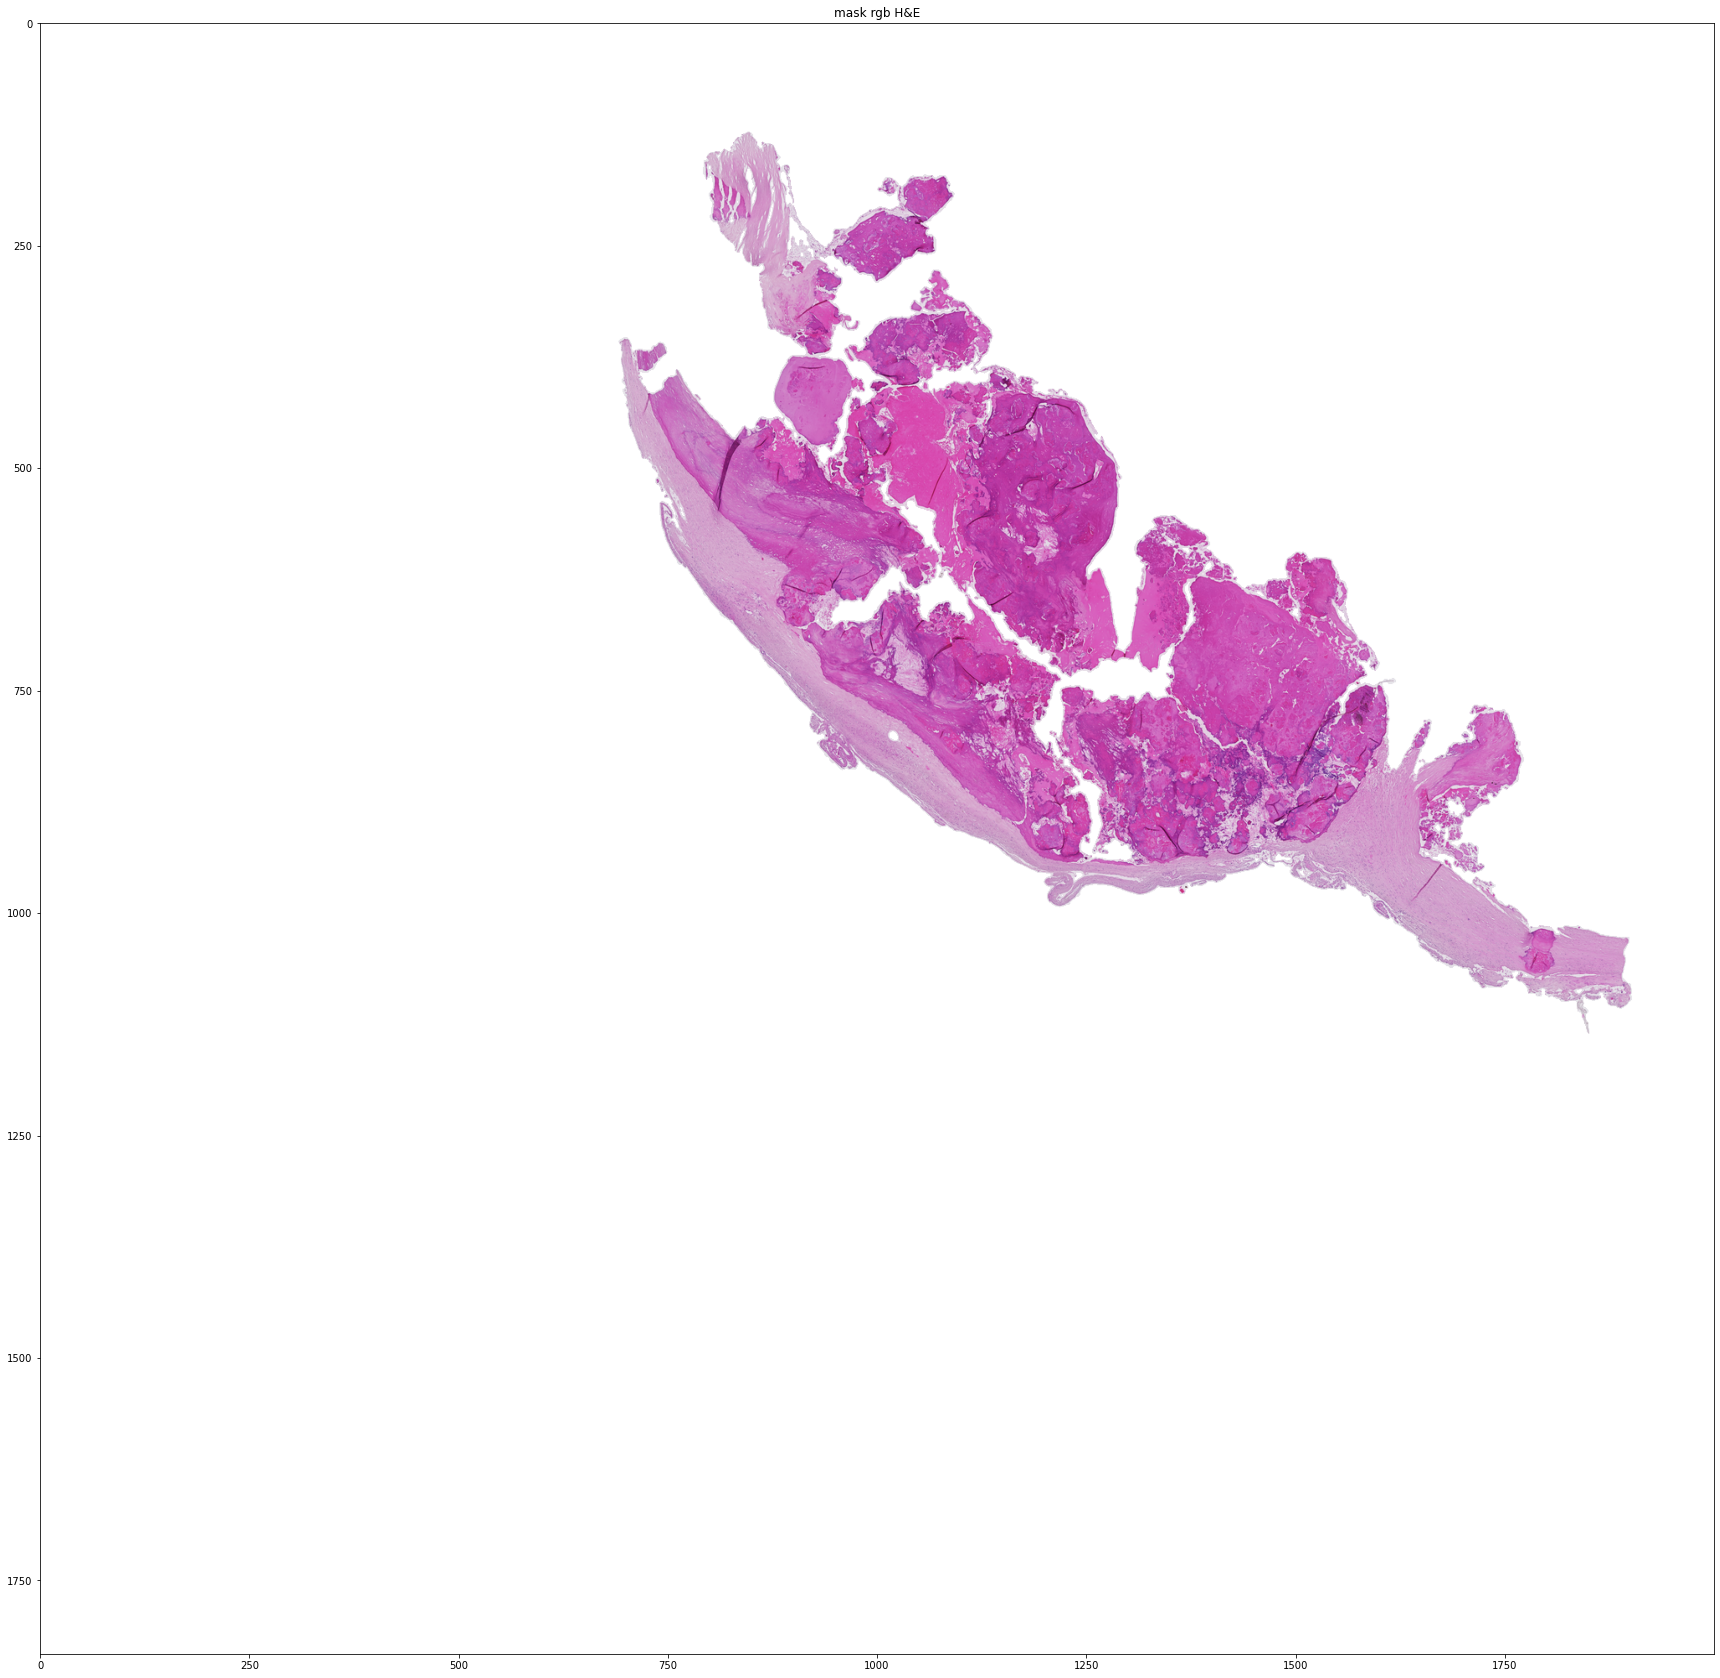

In [15]:
test_tile = cv2.imread('/Users/ys2af/HE/AE1473.UMC.HE_x20_z0.macro.png',1)
mask_255 = cv2.imread('/Users/ys2af/entropy_method_eval_manual/export/HE/AE1473.UMC.HE_x20_z0.macro_label.png',0)
thresh1 = cv2.bitwise_not(deepcopy(mask_255))

thresh1_3d = np.stack((thresh1,thresh1,thresh1),axis = -1)
mask_test_tile_pre = cv2.bitwise_and(test_tile, test_tile, mask=mask_255)

mask_test_tile = cv2.add(mask_test_tile_pre, thresh1_3d)

cv2.imwrite('/Users/ys2af/Writing lab/entropy method/sample_images/AE1473.UMC.HE_x20_z0.macro_masked.png',mask_test_tile)
plt.figure(figsize = (30,30))
plt.title('mask rgb H&E')
plt.imshow(cv2.cvtColor(mask_test_tile, cv2.COLOR_BGR2RGB),aspect='auto')

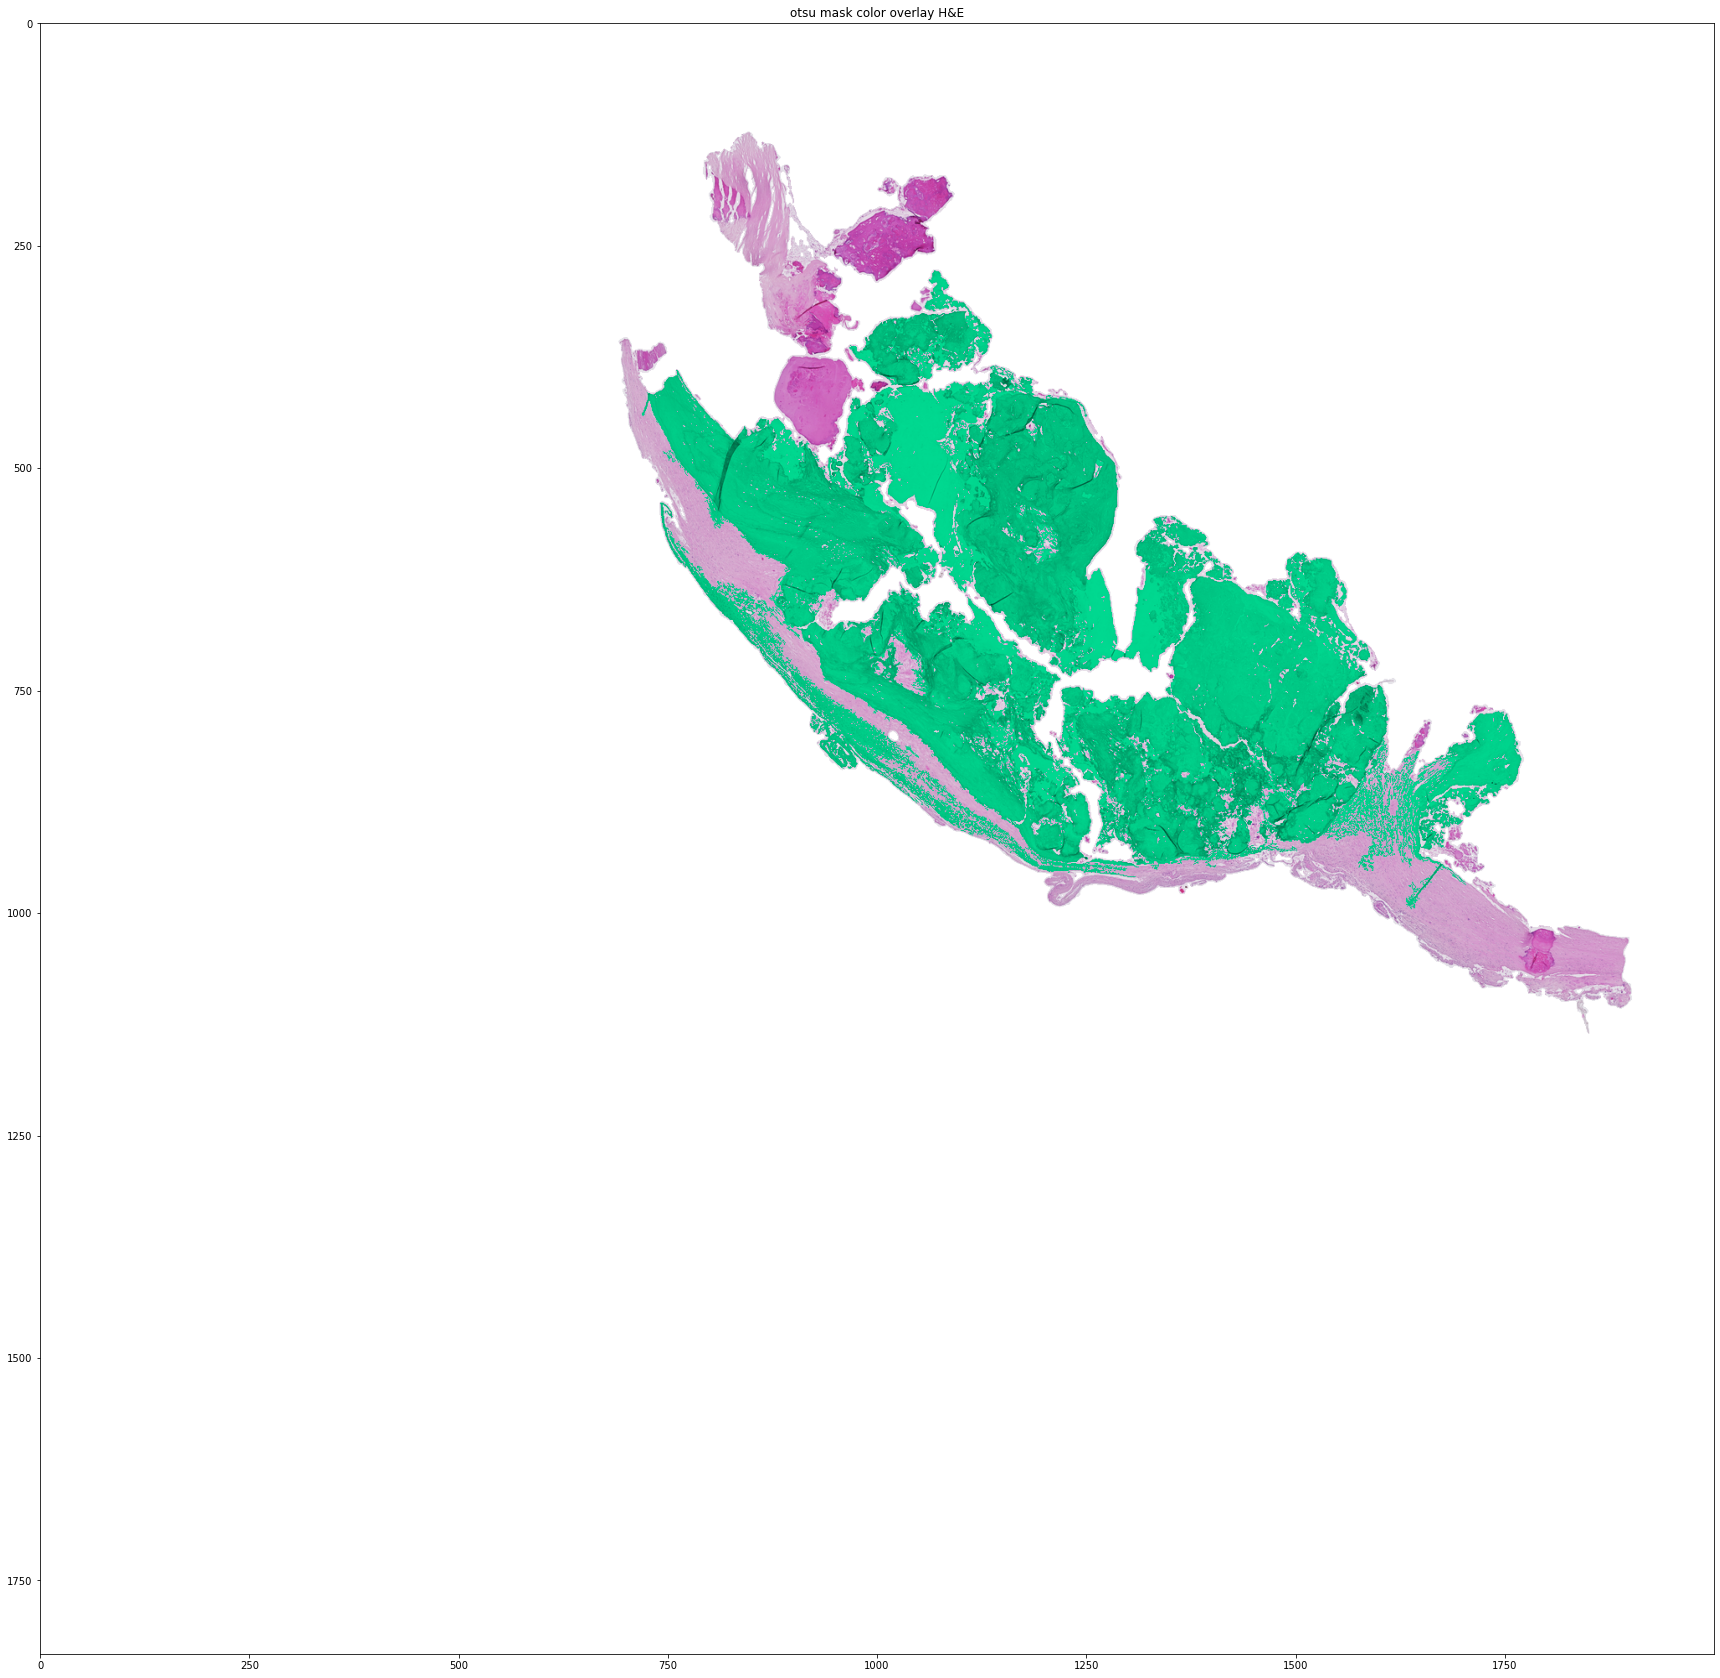

In [28]:

mask_255 = cv2.imread('/Users/ys2af/entropy_method_eval_manual/export/HE/otsu/AE1473.UMC.HE_x20_z0.macro_otsumask.png',0)
mask_255_bool = np.array(mask_255, dtype=bool)

test_tile_hsv = cv2.cvtColor(mask_test_tile, cv2.COLOR_BGR2HSV)
test_tile_hsv[mask_255_bool, 0] = 80
test_tile_hsv[mask_255_bool, 1] = 255
test_tile_bgr = cv2.cvtColor(test_tile_hsv, cv2.COLOR_HSV2BGR)
cv2.imwrite("/Users/ys2af/Writing lab/entropy method/sample_images/AE1473.UMC.HE_x20_z0.macro_masked_otsu.png",test_tile_bgr)
plt.figure(figsize = (30,30))
plt.title('otsu mask color overlay H&E')
plt.imshow(cv2.cvtColor(test_tile_bgr, cv2.COLOR_BGR2RGB),aspect='auto')

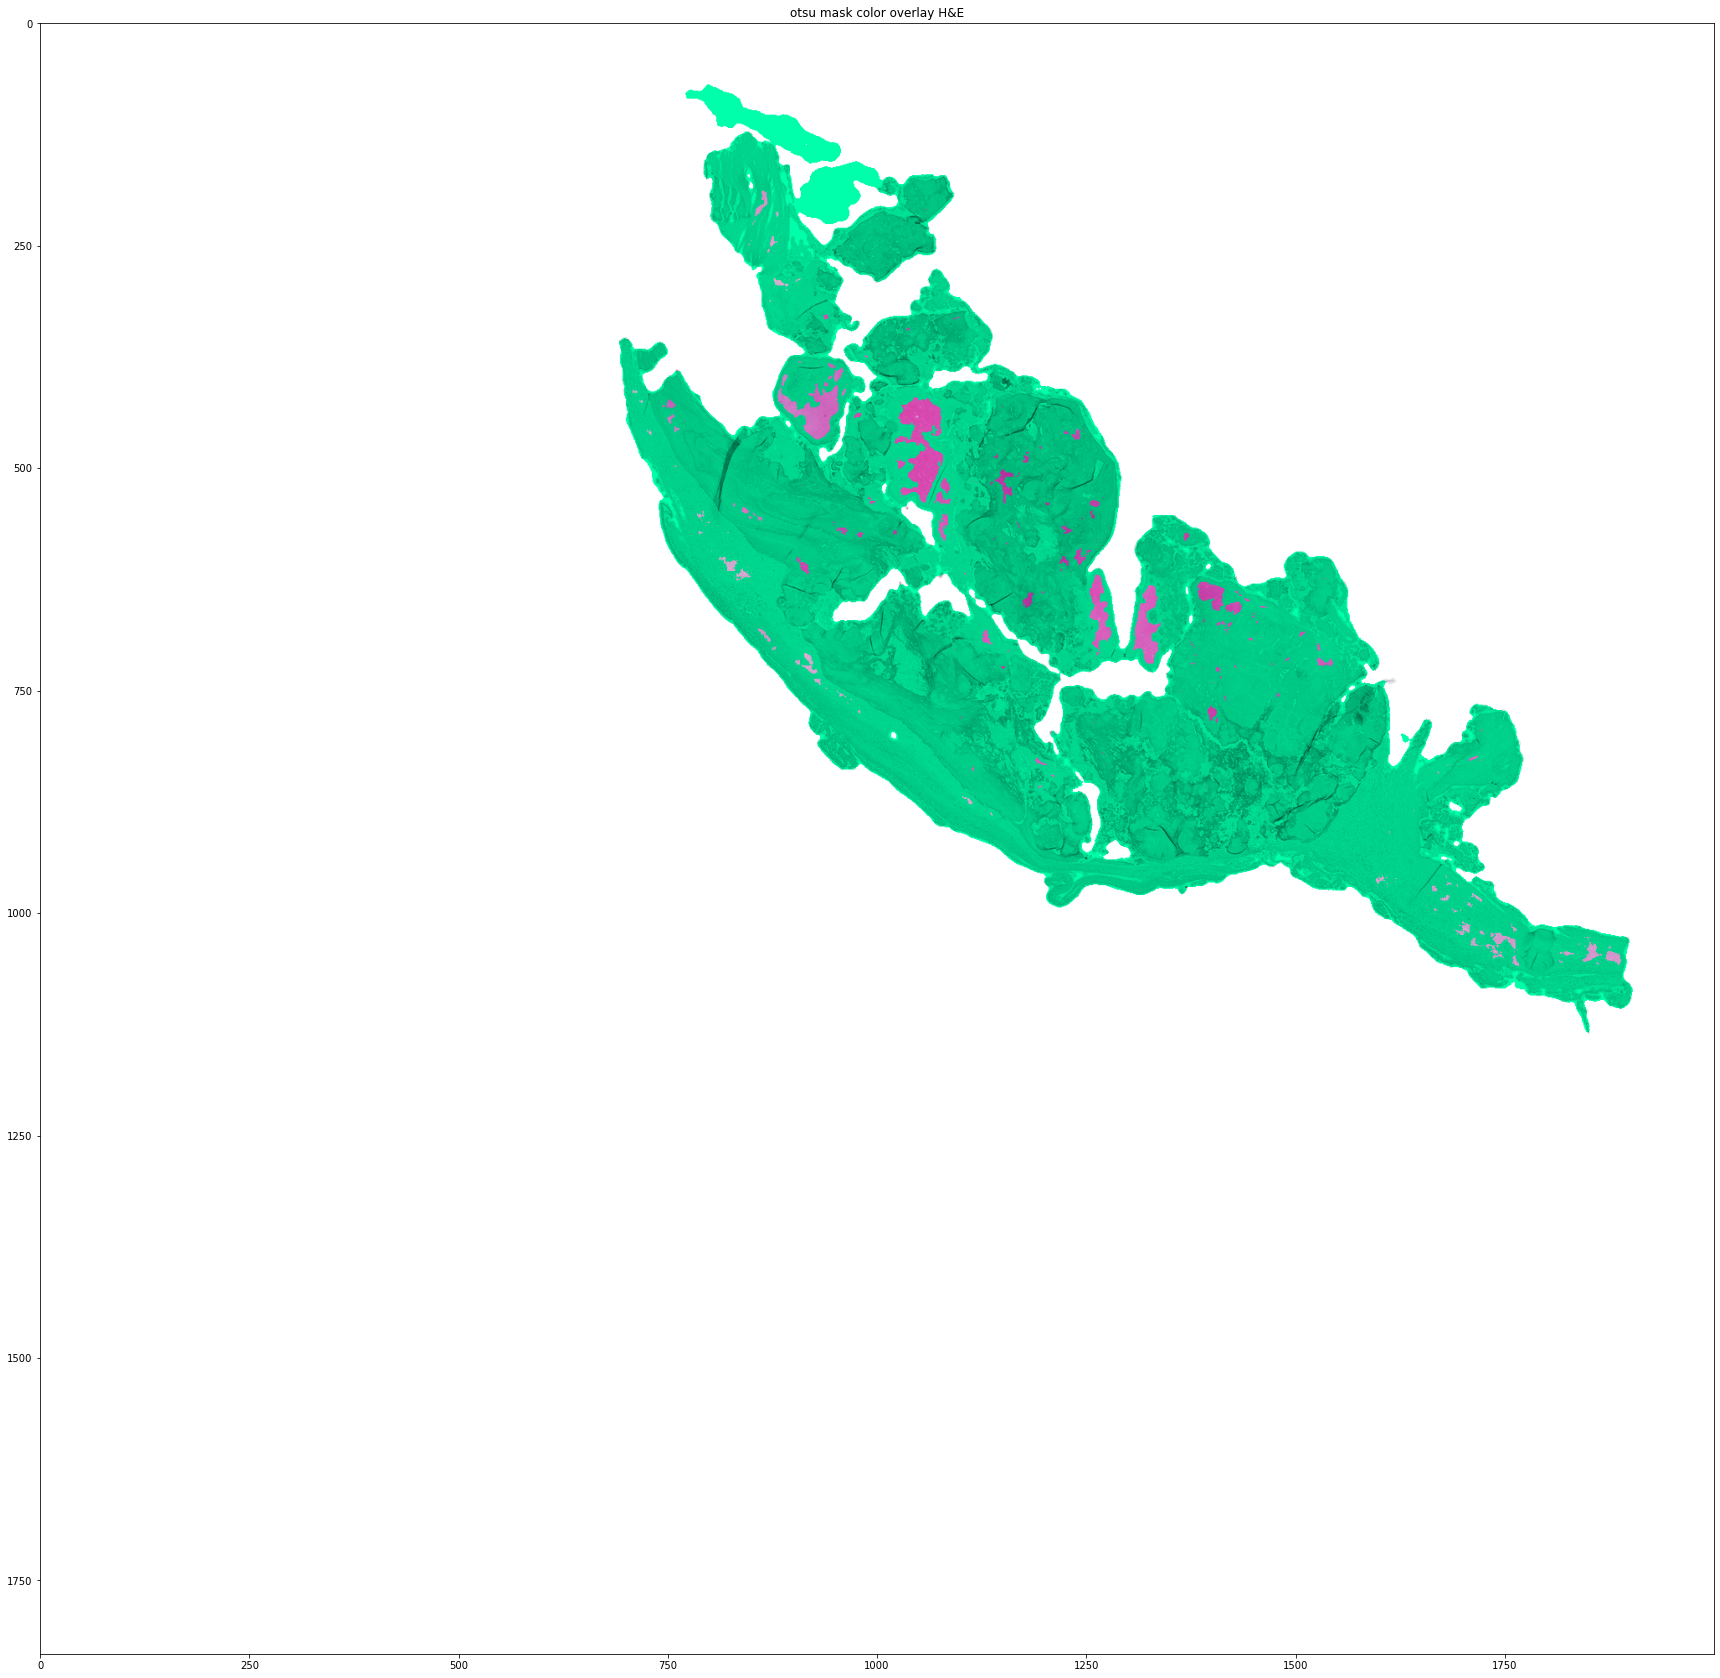

In [29]:
mask_255 = cv2.imread('/Users/ys2af/entropy_method_eval_manual/export/HE/entropy/AE1473.UMC.HE_x20_z0.macro_entropymask.png',0)
mask_255_bool = np.array(mask_255, dtype=bool)

test_tile_hsv = cv2.cvtColor(mask_test_tile, cv2.COLOR_BGR2HSV)
test_tile_hsv[mask_255_bool, 0] = 80
test_tile_hsv[mask_255_bool, 1] = 255
test_tile_bgr = cv2.cvtColor(test_tile_hsv, cv2.COLOR_HSV2BGR)
cv2.imwrite("/Users/ys2af/Writing lab/entropy method/sample_images/AE1473.UMC.HE_x20_z0.macro_masked_entropy.png",test_tile_bgr)
plt.figure(figsize = (30,30))
plt.title('otsu mask color overlay H&E')
plt.imshow(cv2.cvtColor(test_tile_bgr, cv2.COLOR_BGR2RGB),aspect='auto')

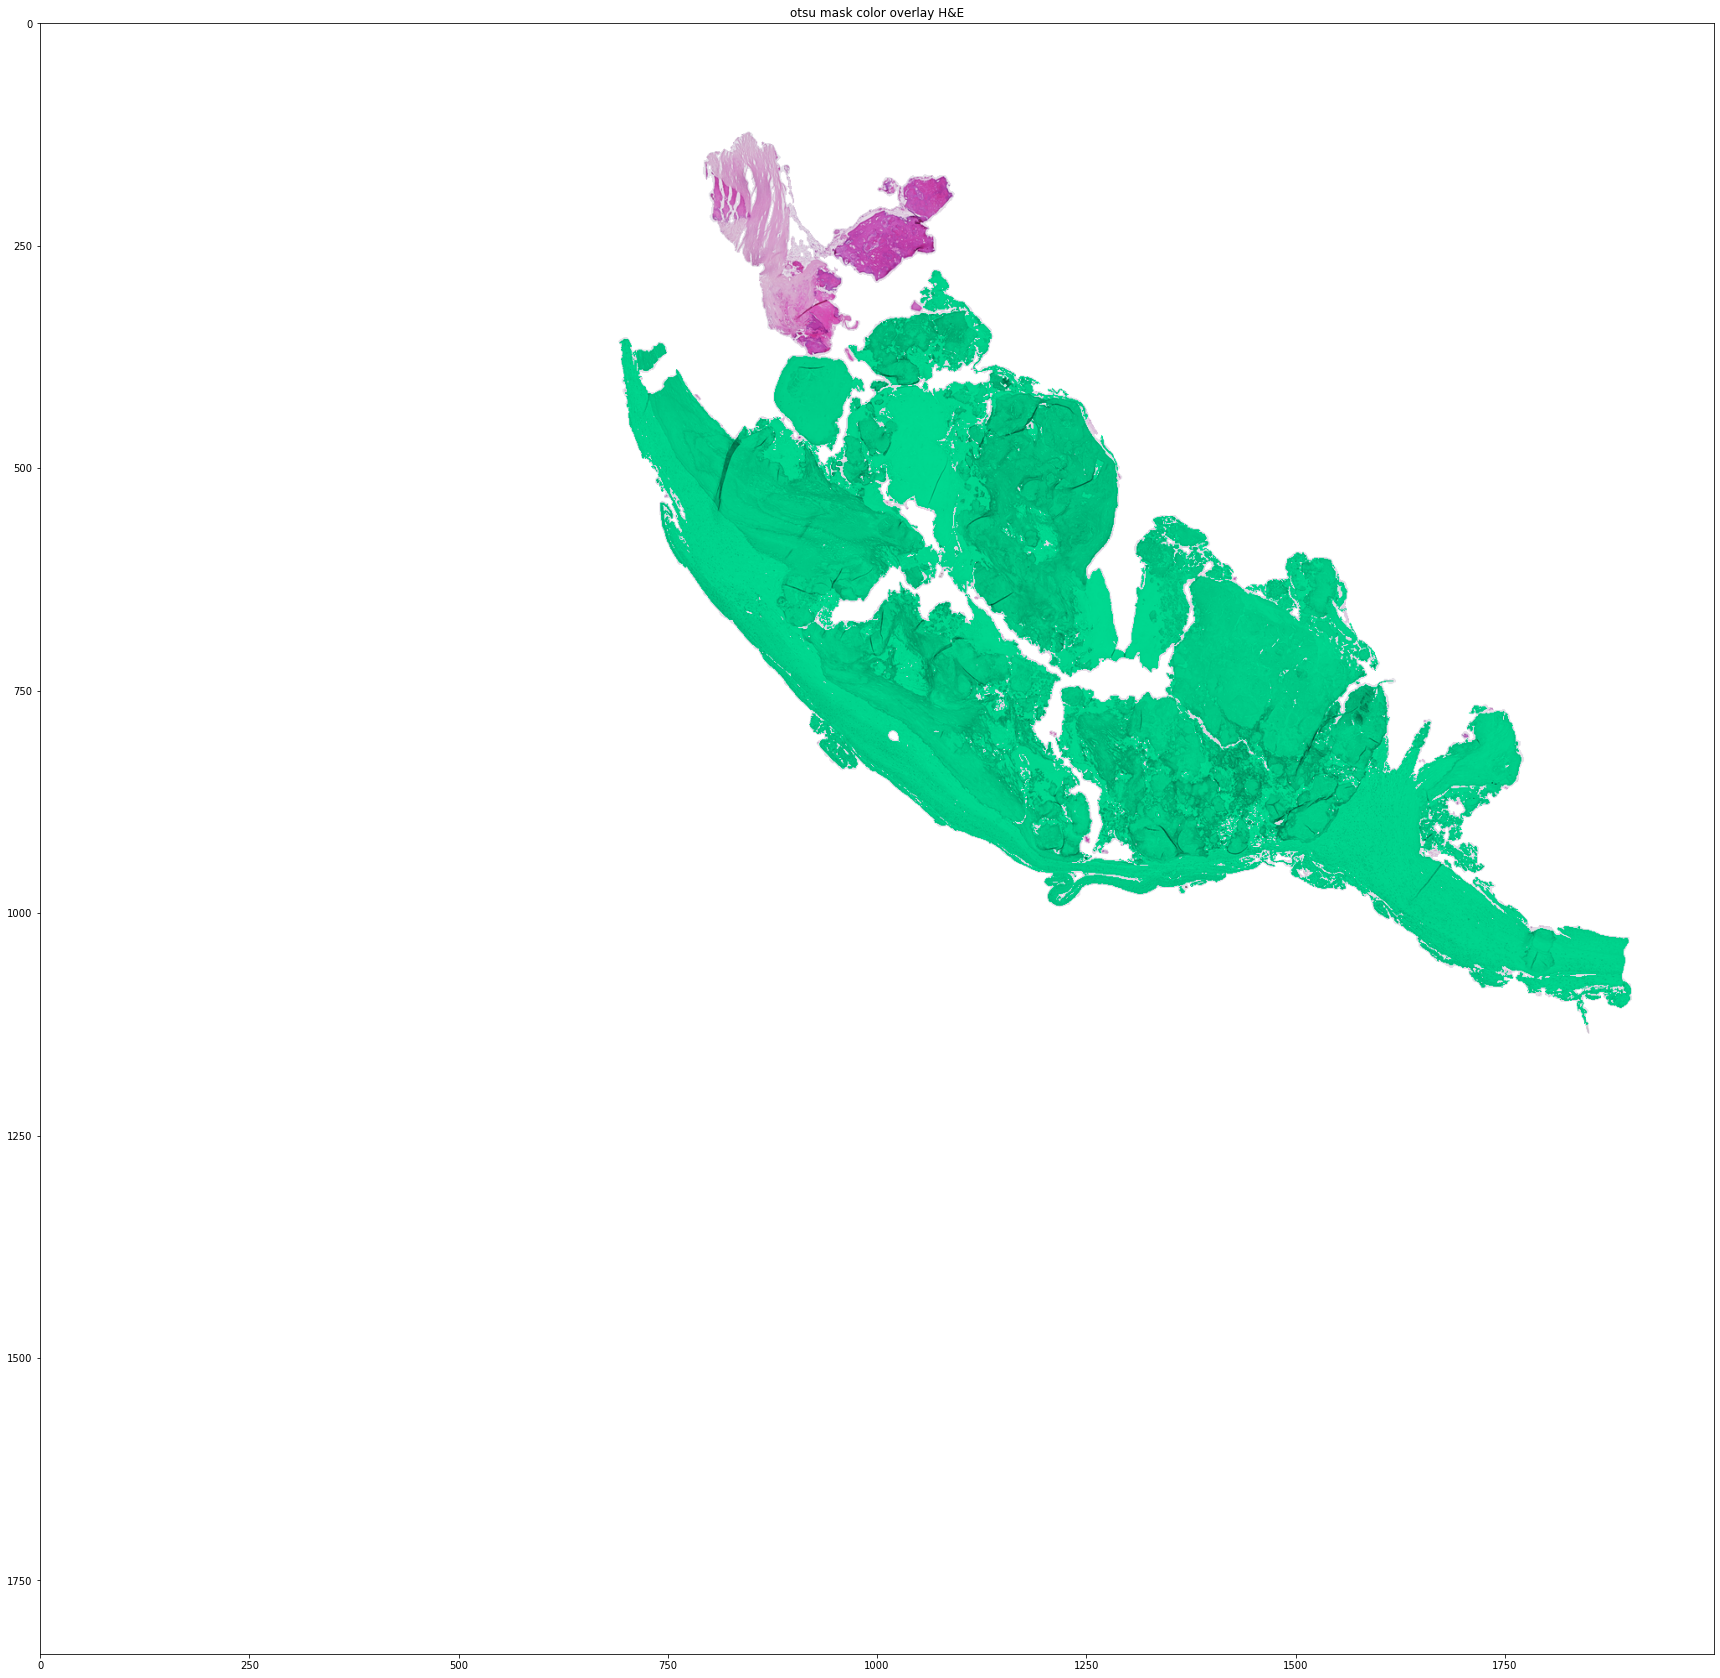

In [30]:
mask_255 = cv2.imread('/Users/ys2af/entropy_method_eval_manual/export/HE/slidemask/AE1473.UMC.HE_x20_z0.macro_slidemask.png',0)
mask_255_bool = np.array(mask_255, dtype=bool)

test_tile_hsv = cv2.cvtColor(mask_test_tile, cv2.COLOR_BGR2HSV)
test_tile_hsv[mask_255_bool, 0] = 80
test_tile_hsv[mask_255_bool, 1] = 255
test_tile_bgr = cv2.cvtColor(test_tile_hsv, cv2.COLOR_HSV2BGR)
cv2.imwrite("/Users/ys2af/Writing lab/entropy method/sample_images/AE1473.UMC.HE_x20_z0.macro_masked_slidemask.png",test_tile_bgr)
plt.figure(figsize = (30,30))
plt.title('otsu mask color overlay H&E')
plt.imshow(cv2.cvtColor(test_tile_bgr, cv2.COLOR_BGR2RGB),aspect='auto')

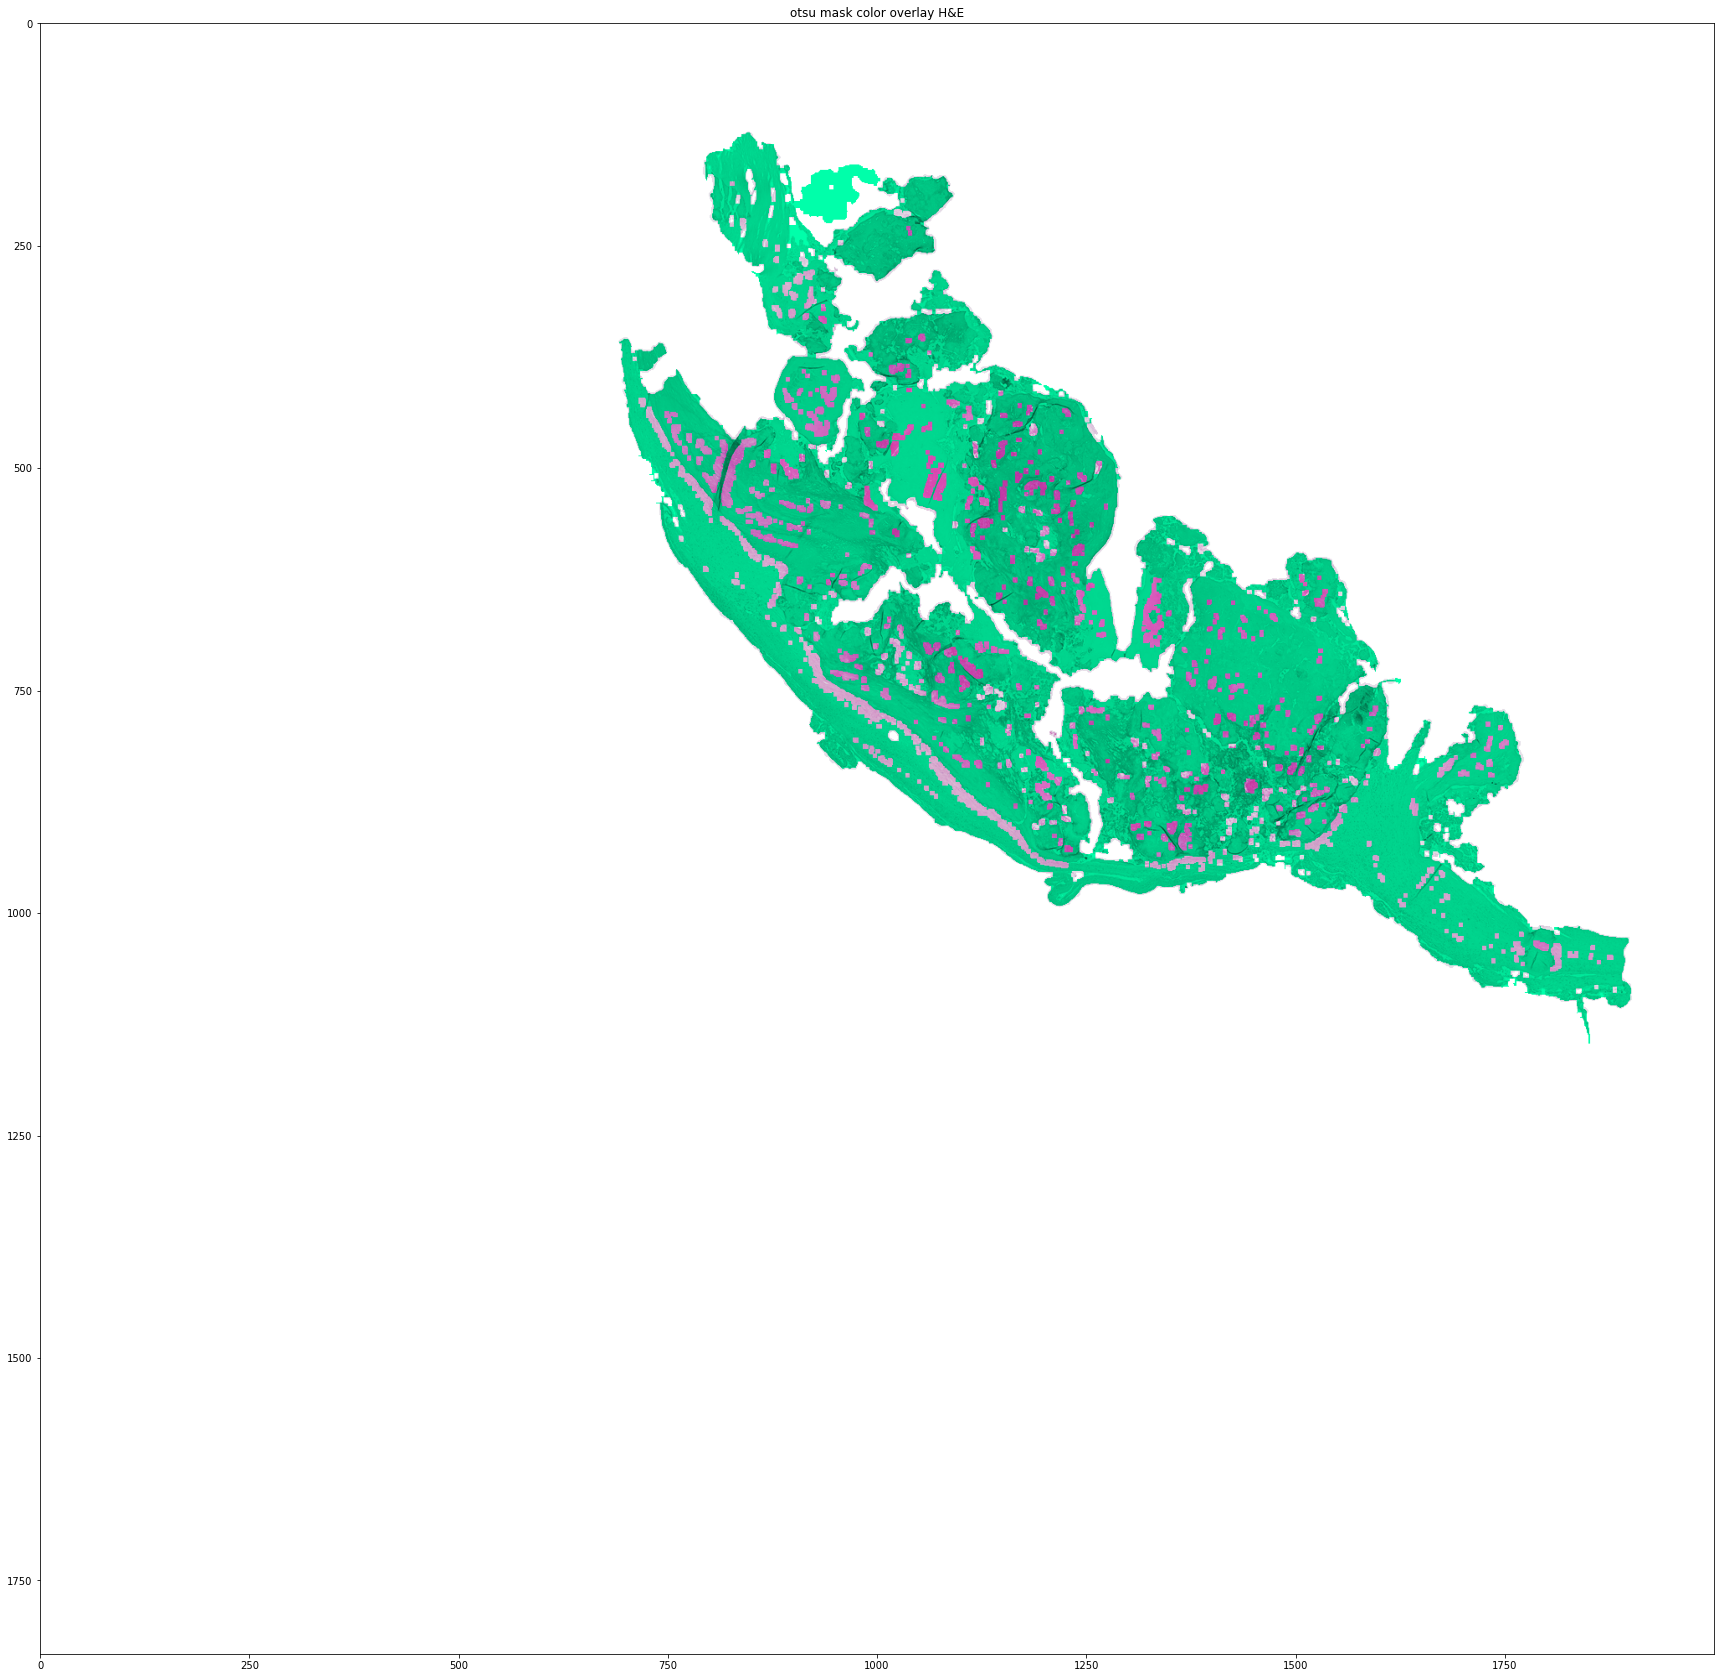

In [31]:
mask_255 = cv2.imread('/Users/ys2af/entropy_method_eval_manual/export/HE/adaptive_mean/AE1473.UMC.HE_x20_z0.macro_adaptive_meanmask.png',0)
mask_255_bool = np.array(mask_255, dtype=bool)

test_tile_hsv = cv2.cvtColor(mask_test_tile, cv2.COLOR_BGR2HSV)
test_tile_hsv[mask_255_bool, 0] = 80
test_tile_hsv[mask_255_bool, 1] = 255
test_tile_bgr = cv2.cvtColor(test_tile_hsv, cv2.COLOR_HSV2BGR)
cv2.imwrite("/Users/ys2af/Writing lab/entropy method/sample_images/AE1473.UMC.HE_x20_z0.macro_masked_adaptivemean.png",test_tile_bgr)
plt.figure(figsize = (30,30))
plt.title('otsu mask color overlay H&E')
plt.imshow(cv2.cvtColor(test_tile_bgr, cv2.COLOR_BGR2RGB),aspect='auto')

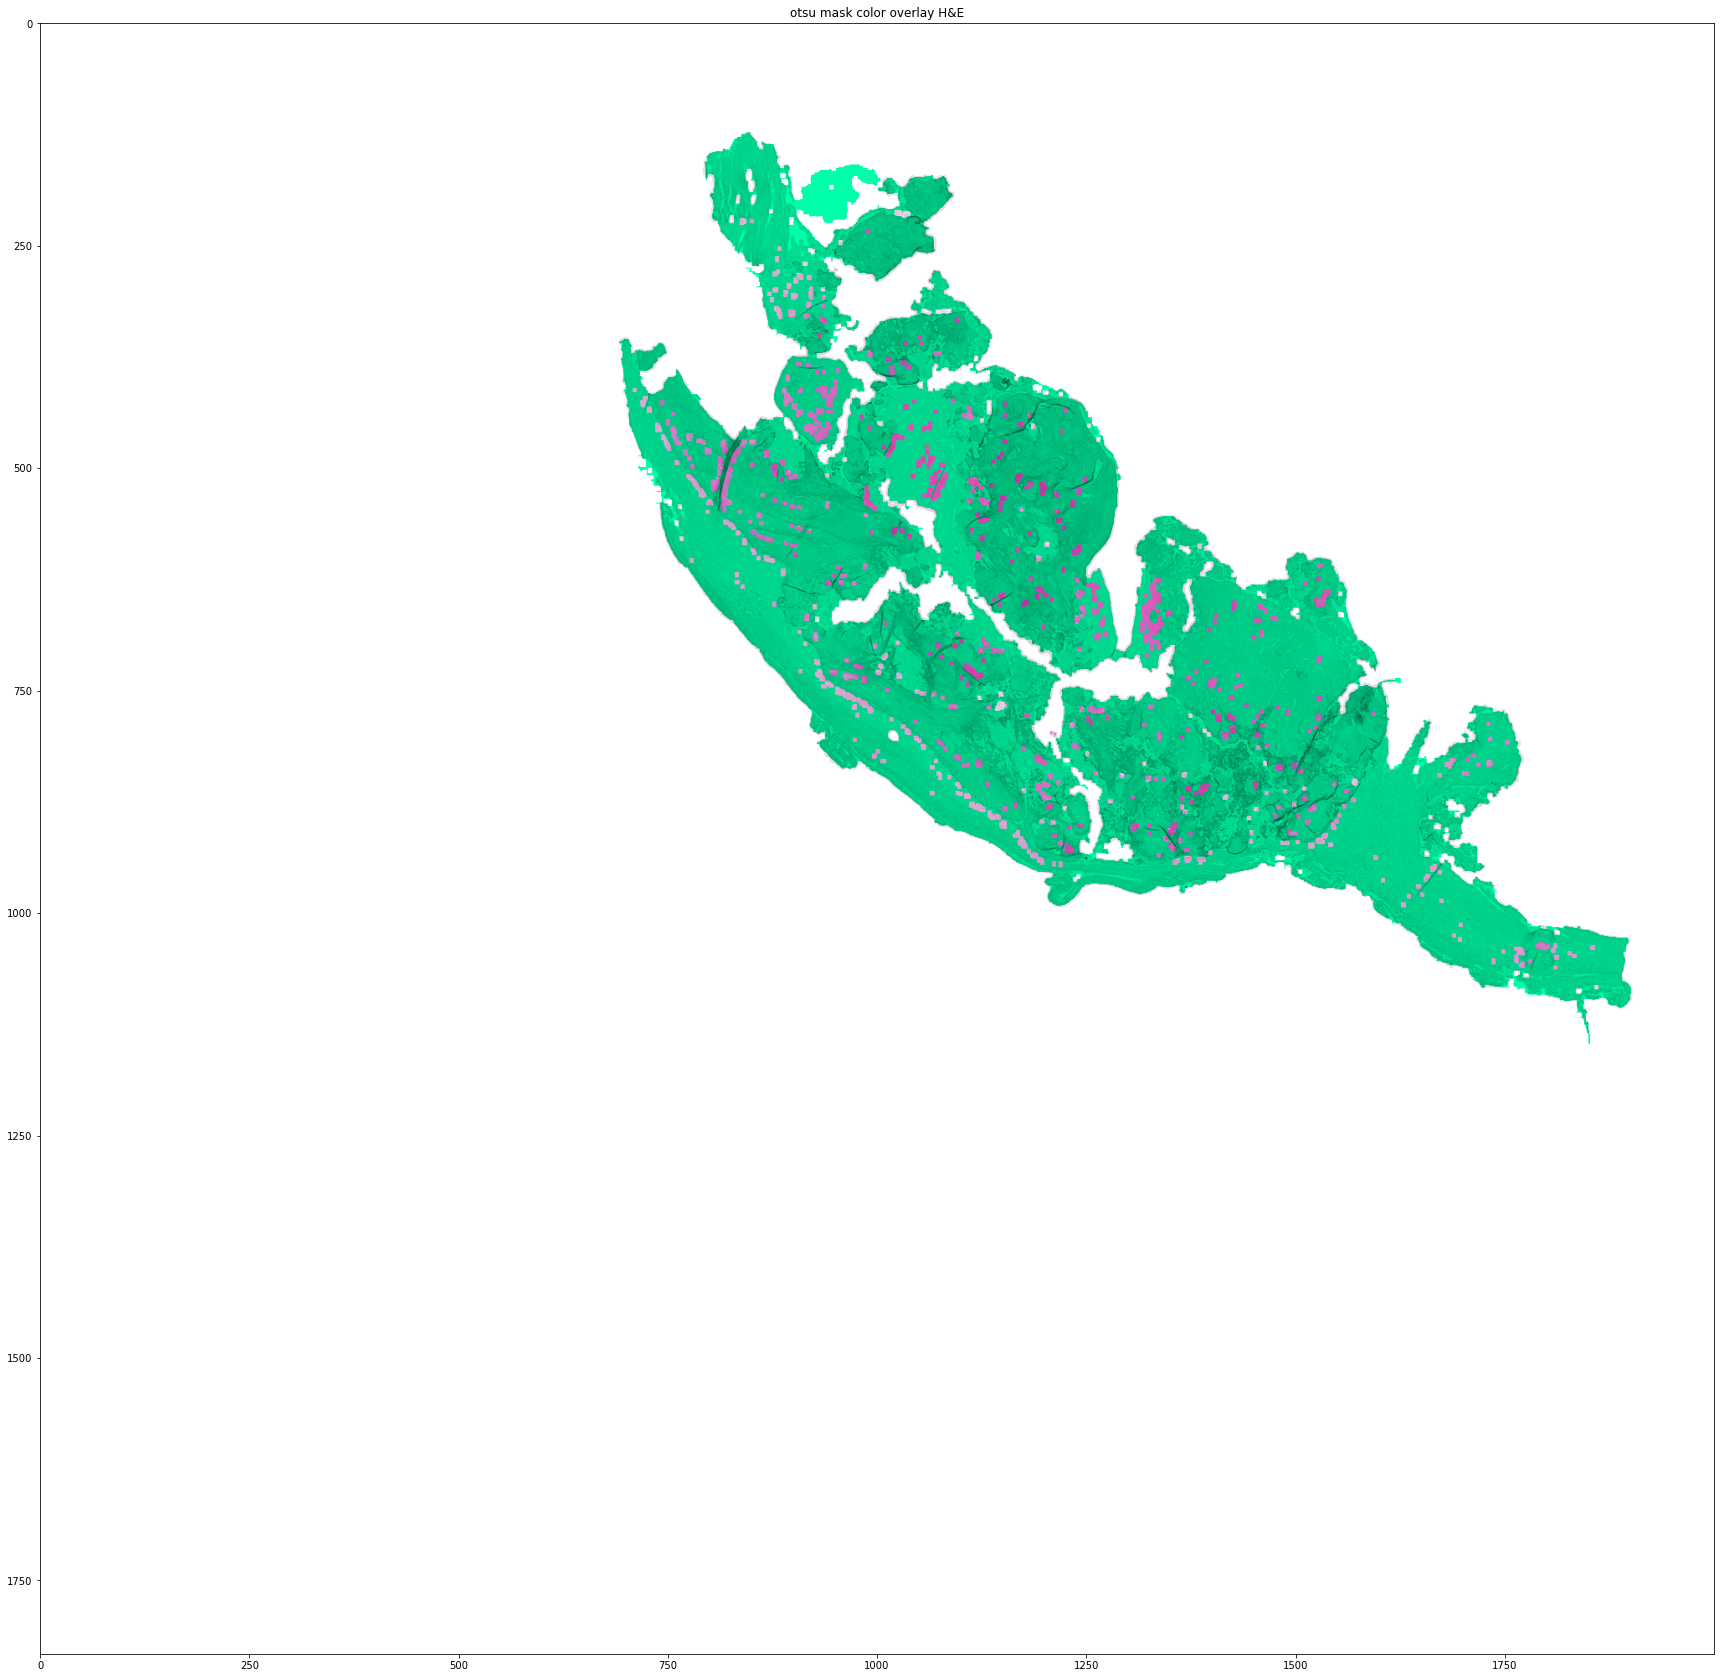

In [32]:
mask_255 = cv2.imread('/Users/ys2af/entropy_method_eval_manual/export/HE/adaptive_gaussian/AE1473.UMC.HE_x20_z0.macro_adaptive_gaussianmask.png',0)
mask_255_bool = np.array(mask_255, dtype=bool)

test_tile_hsv = cv2.cvtColor(mask_test_tile, cv2.COLOR_BGR2HSV)
test_tile_hsv[mask_255_bool, 0] = 80
test_tile_hsv[mask_255_bool, 1] = 255
test_tile_bgr = cv2.cvtColor(test_tile_hsv, cv2.COLOR_HSV2BGR)
cv2.imwrite("/Users/ys2af/Writing lab/entropy method/sample_images/AE1473.UMC.HE_x20_z0.macro_masked_adaptivegaussian.png",test_tile_bgr)
plt.figure(figsize = (30,30))
plt.title('otsu mask color overlay H&E')
plt.imshow(cv2.cvtColor(test_tile_bgr, cv2.COLOR_BGR2RGB),aspect='auto')

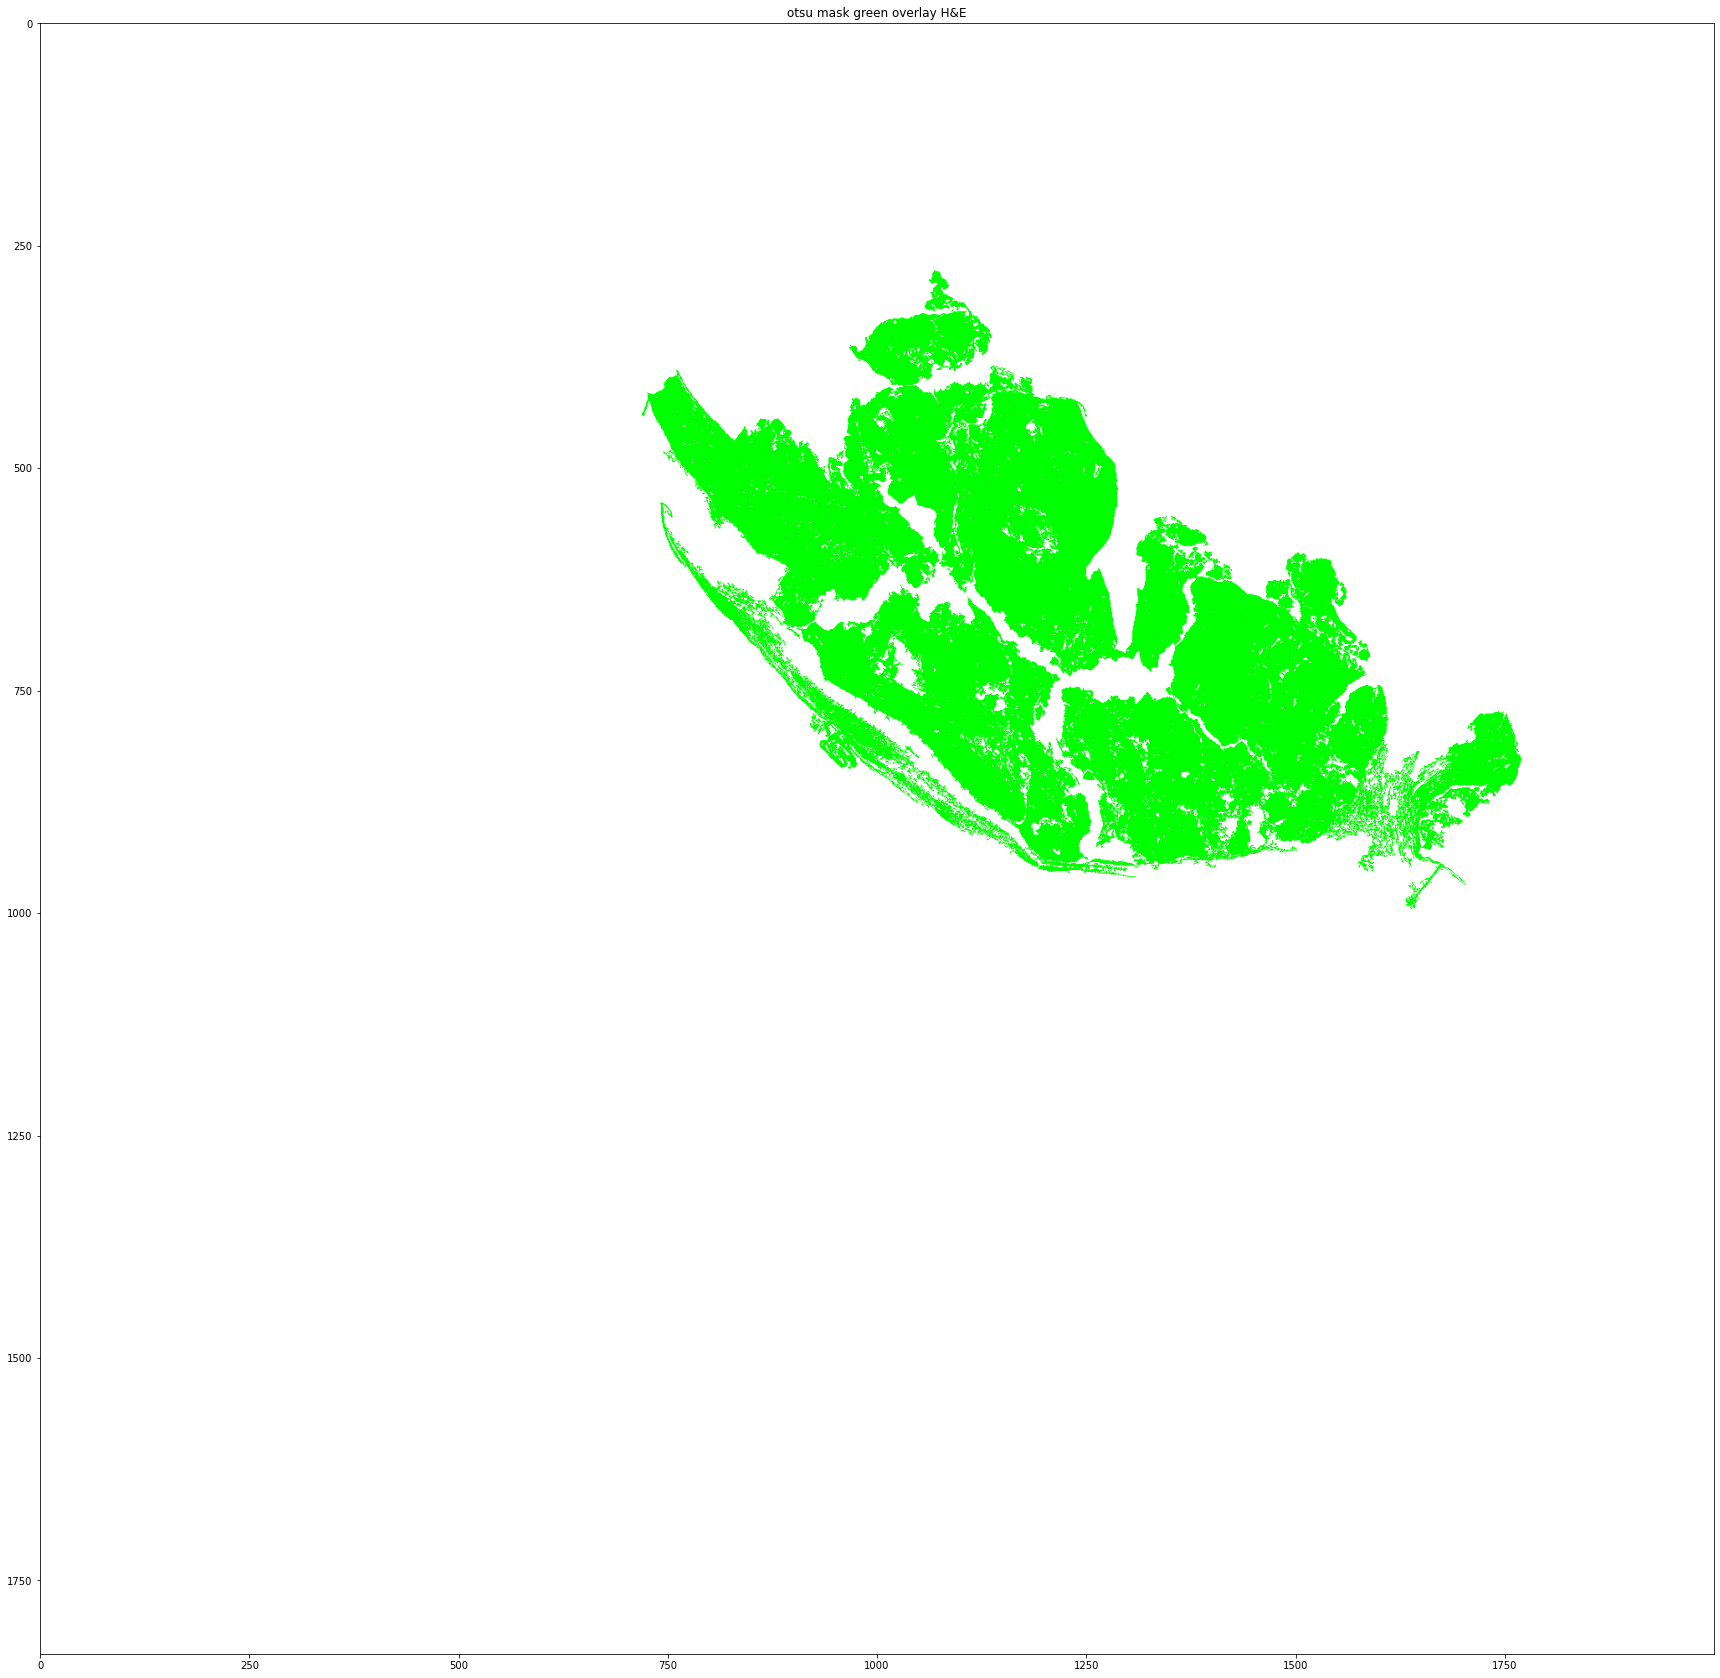

In [21]:
#no need
mask_otsu_255 = cv2.imread('/Users/ys2af/entropy_method_eval_manual/export/HE/otsu/AE1473.UMC.HE_x20_z0.macro_otsumask.png',0)
thresh1_otsu = cv2.bitwise_not(deepcopy(mask_otsu_255))
thresh1_otsu_3d = np.stack((thresh1_otsu,thresh1_otsu,thresh1_otsu),axis = -1)

mask_test_tile_otsu_pre = cv2.bitwise_and(test_tile, test_tile, mask=mask_otsu_255)
mask_test_tile_otsu_pre[:,:,0],mask_test_tile_otsu_pre[:,:,1],mask_test_tile_otsu_pre[:,:,2] = (0,255,0)
mask_test_otsu_tile = cv2.add(mask_test_tile_otsu_pre, thresh1_otsu_3d)


plt.figure(figsize = (30,30))
plt.title('otsu mask green overlay H&E')
plt.imshow(cv2.cvtColor(mask_test_otsu_tile, cv2.COLOR_BGR2RGB),aspect='auto')

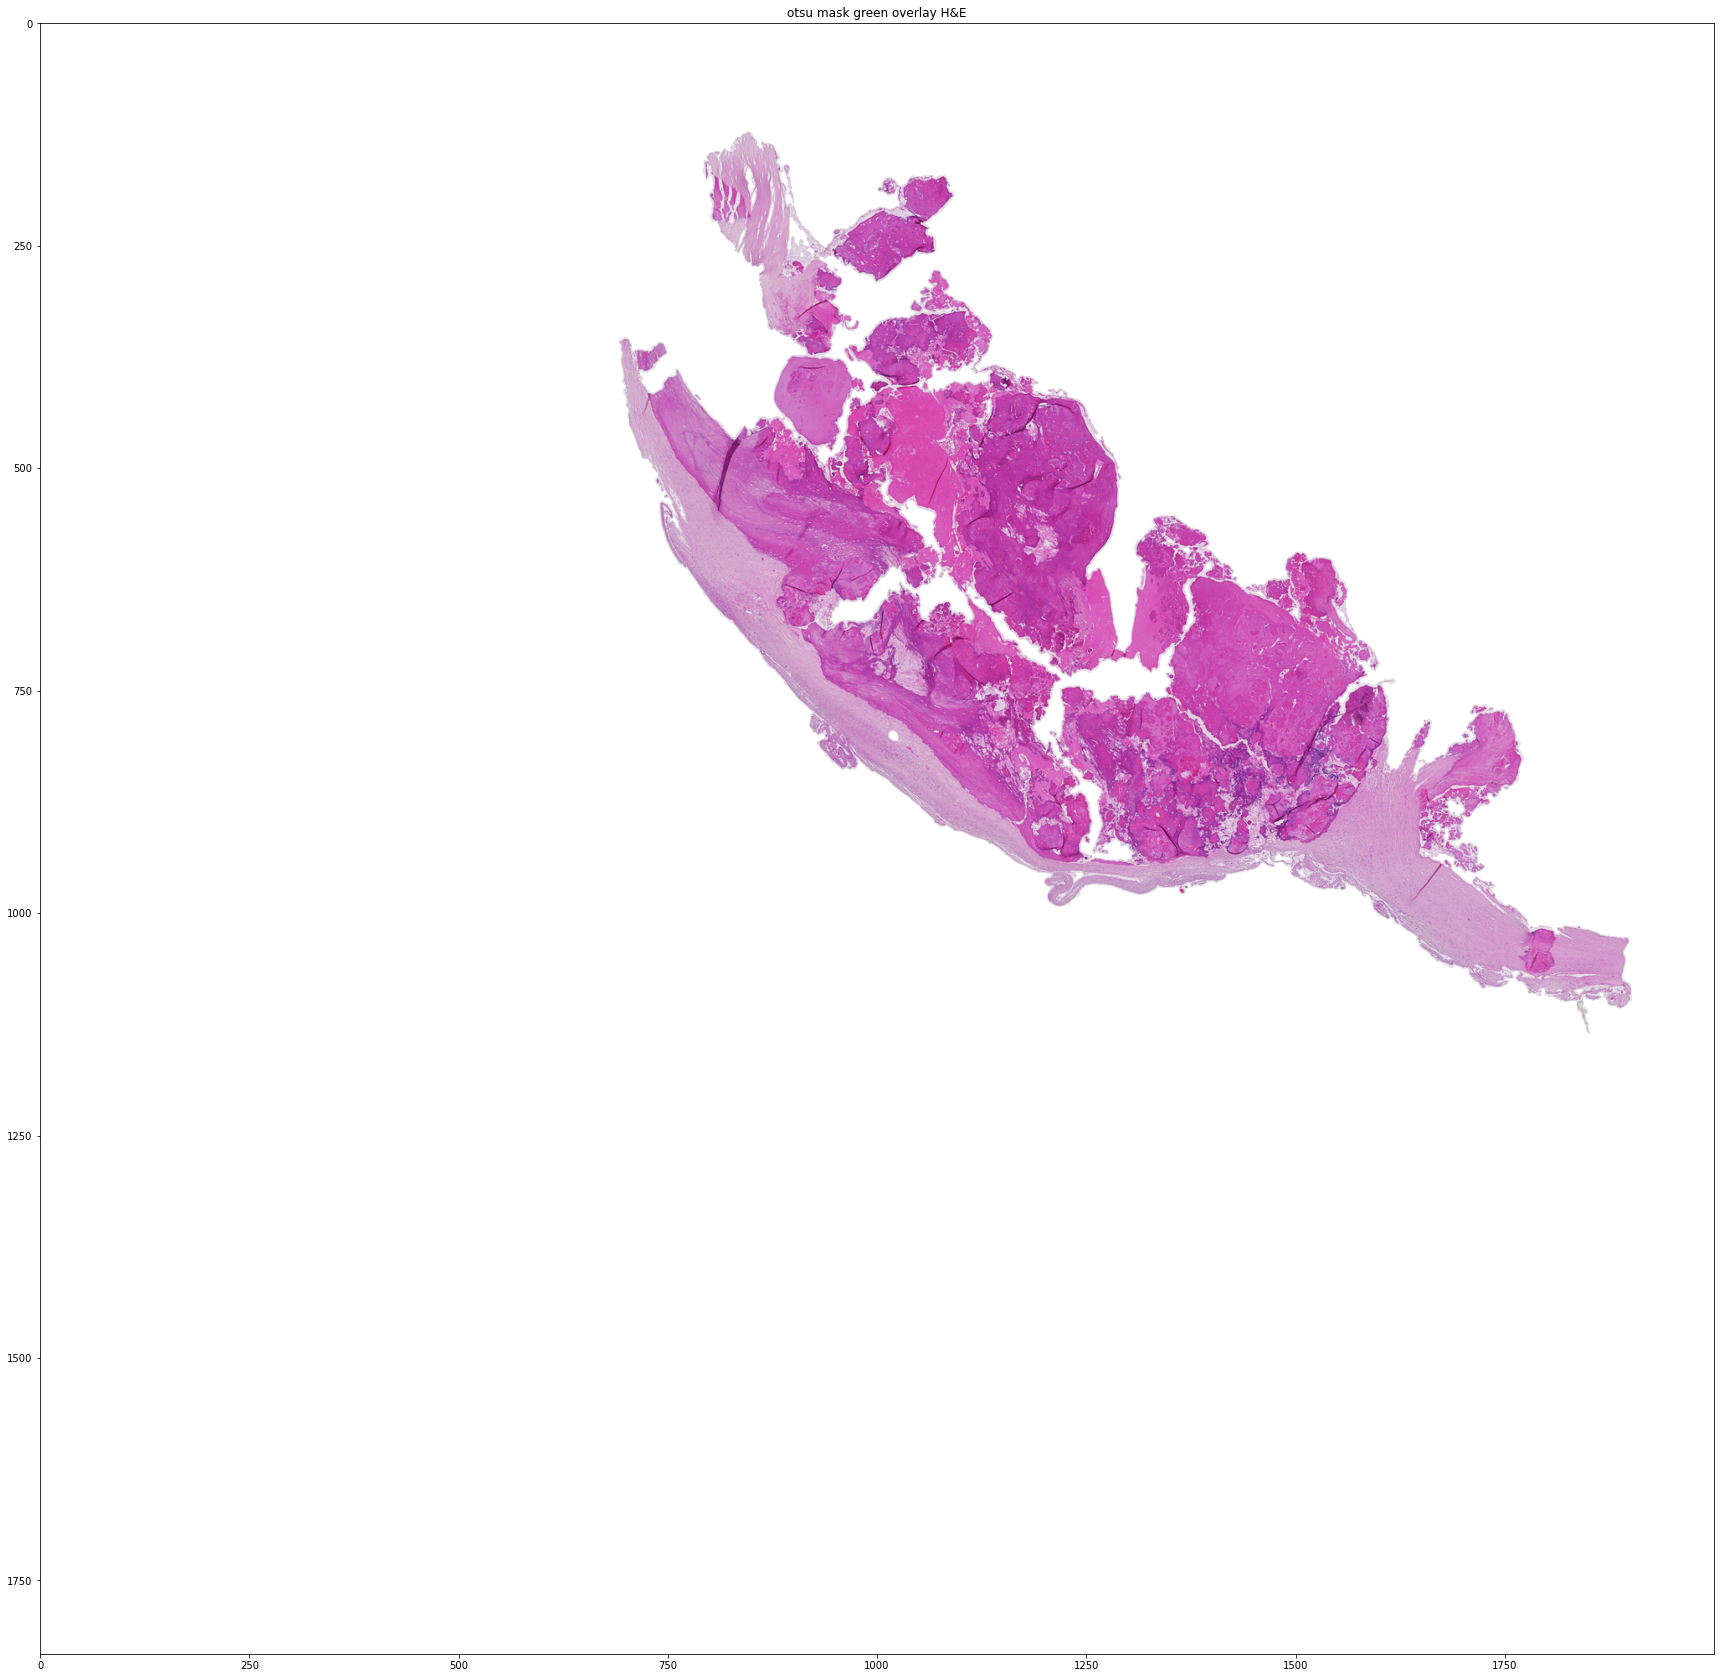

In [24]:
#no need
mask_test_otsu_tile_overlay = cv2.add(mask_test_otsu_tile,mask_test_tile)
plt.figure(figsize = (30,30))
plt.title('otsu mask green overlay H&E')
plt.imshow(cv2.cvtColor(mask_test_tile, cv2.COLOR_BGR2RGB),aspect='auto')

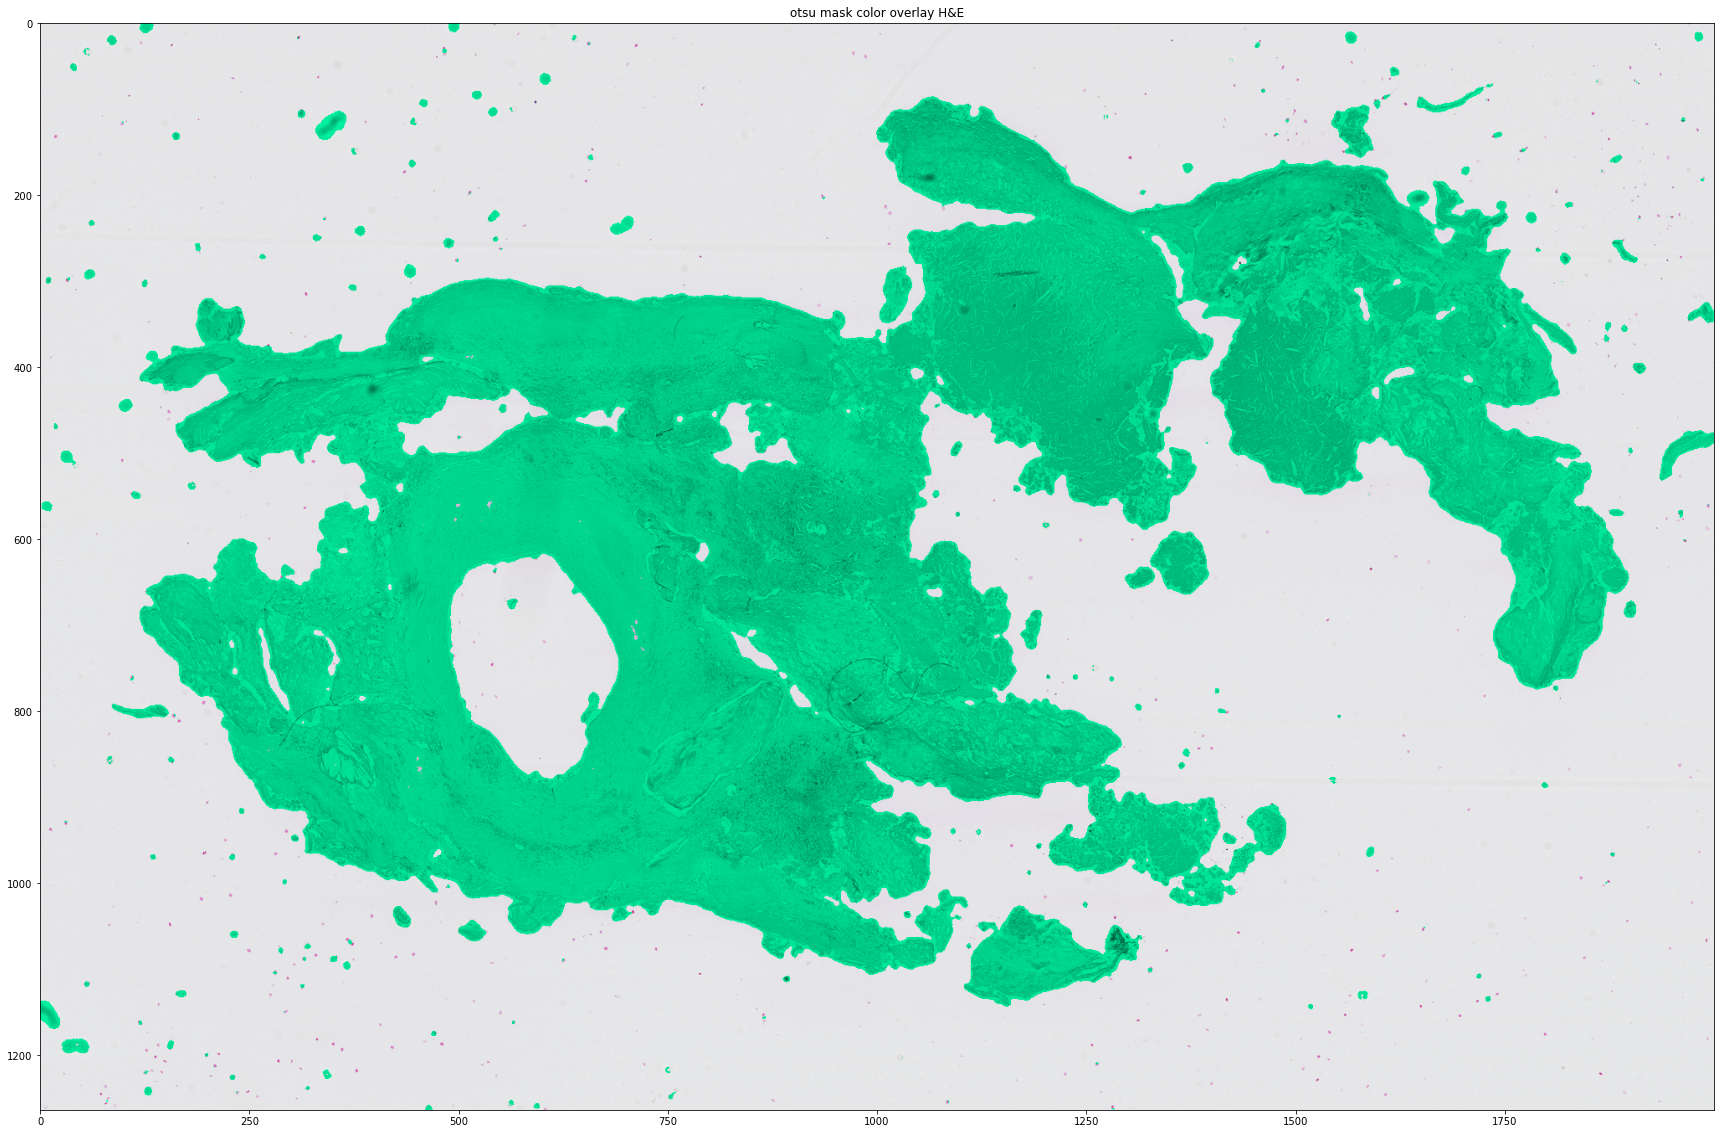

In [34]:
test_tile = cv2.imread("/Users/ys2af/HE/AE1222.UMC.HE_x20_z0.macro.png",1)
mask_255 = cv2.imread('/Users/ys2af/entropy_method_eval_manual/export/HE/entropy/AE1222.UMC.HE_x20_z0.macro_wholemask.png',0)
mask_255_bool = np.array(mask_255, dtype=bool)

test_tile_hsv = cv2.cvtColor(test_tile, cv2.COLOR_BGR2HSV)
test_tile_hsv[mask_255_bool, 0] = 80
test_tile_hsv[mask_255_bool, 1] = 255
test_tile_bgr = cv2.cvtColor(test_tile_hsv, cv2.COLOR_HSV2BGR)
cv2.imwrite("/Users/ys2af/Writing lab/entropy method/sample_images/different_stains/AE1222.UMC.HE_x20_z0.macro_wholemask_entropy.png",test_tile_bgr)
plt.figure(figsize = (30,20))
plt.title('otsu mask color overlay H&E')
plt.imshow(cv2.cvtColor(test_tile_bgr, cv2.COLOR_BGR2RGB),aspect='auto')

In [35]:
test_tile = cv2.imread("/Users/ys2af/GLYCC/AE3884.GLYCC_x20_z0.macro.png",1)
mask_255 = cv2.imread('/Users/ys2af/entropy_method_eval_manual/export/GLYCC/entropy/AE3884.GLYCC_x20_z0.macro_wholemask.png',0)
mask_255_bool = np.array(mask_255, dtype=bool)

test_tile_hsv = cv2.cvtColor(test_tile, cv2.COLOR_BGR2HSV)
test_tile_hsv[mask_255_bool, 0] = 80
test_tile_hsv[mask_255_bool, 1] = 255
test_tile_bgr = cv2.cvtColor(test_tile_hsv, cv2.COLOR_HSV2BGR)
cv2.imwrite("/Users/ys2af/Writing lab/entropy method/sample_images/different_stains/AE3884.GLYCC_x20_z0.macro_wholemask_entropy.png",test_tile_bgr)

True

In [36]:
test_tile = cv2.imread("/Users/ys2af/FIBRIN/AE489.FIBRIN.macro.png",1)
mask_255 = cv2.imread('/Users/ys2af/entropy_method_eval_manual/export/FIBRIN/entropy/AE489.FIBRIN.macro_wholemask.png',0)
mask_255_bool = np.array(mask_255, dtype=bool)

test_tile_hsv = cv2.cvtColor(test_tile, cv2.COLOR_BGR2HSV)
test_tile_hsv[mask_255_bool, 0] = 80
test_tile_hsv[mask_255_bool, 1] = 255
test_tile_bgr = cv2.cvtColor(test_tile_hsv, cv2.COLOR_HSV2BGR)
cv2.imwrite("/Users/ys2af/Writing lab/entropy method/sample_images/different_stains/AE489.FIBRIN.macro_wholemask_entropy.png",test_tile_bgr)

True

In [37]:
test_tile = cv2.imread("/Users/ys2af/SR/AE1354.UMC.SR.20150911.macro.png",1)
mask_255 = cv2.imread('/Users/ys2af/entropy_method_eval_manual/export/SR/entropy/AE1354.UMC.SR.20150911.macro_wholemask.png',0)
mask_255_bool = np.array(mask_255, dtype=bool)

test_tile_hsv = cv2.cvtColor(test_tile, cv2.COLOR_BGR2HSV)
test_tile_hsv[mask_255_bool, 0] = 80
test_tile_hsv[mask_255_bool, 1] = 255
test_tile_bgr = cv2.cvtColor(test_tile_hsv, cv2.COLOR_HSV2BGR)
cv2.imwrite("/Users/ys2af/Writing lab/entropy method/sample_images/different_stains/AE1354.UMC.SR.20150911.macro_wholemask_entropy.png",test_tile_bgr)

True

In [38]:
test_tile = cv2.imread("/Users/ys2af/SMA/AE2622.SMA.macro.png",1)
mask_255 = cv2.imread('/Users/ys2af/entropy_method_eval_manual/export/SMA/entropy/AE2622.SMA.macro_wholemask.png',0)
mask_255_bool = np.array(mask_255, dtype=bool)

test_tile_hsv = cv2.cvtColor(test_tile, cv2.COLOR_BGR2HSV)
test_tile_hsv[mask_255_bool, 0] = 80
test_tile_hsv[mask_255_bool, 1] = 255
test_tile_bgr = cv2.cvtColor(test_tile_hsv, cv2.COLOR_HSV2BGR)
cv2.imwrite("/Users/ys2af/Writing lab/entropy method/sample_images/different_stains/AE2622.SMA.macro_wholemask_entropy.png",test_tile_bgr)

True

In [39]:
test_tile = cv2.imread("/Users/ys2af/EVG/AE2637.EVG.891.macro.png",1)
mask_255 = cv2.imread('/Users/ys2af/entropy_method_eval_manual/export/EVG/entropy/AE2637.EVG.891.macro_wholemask.png',0)
mask_255_bool = np.array(mask_255, dtype=bool)

test_tile_hsv = cv2.cvtColor(test_tile, cv2.COLOR_BGR2HSV)
test_tile_hsv[mask_255_bool, 0] = 80
test_tile_hsv[mask_255_bool, 1] = 255
test_tile_bgr = cv2.cvtColor(test_tile_hsv, cv2.COLOR_HSV2BGR)
cv2.imwrite("/Users/ys2af/Writing lab/entropy method/sample_images/different_stains/AE2637.EVG.891.macro_wholemask_entropy.png",test_tile_bgr)

True

In [40]:
test_tile = cv2.imread("/Users/ys2af/CD68/AE100.T02-21440.CD68.20141128.macro.png",1)
mask_255 = cv2.imread('/Users/ys2af/entropy_method_eval_manual/export/CD68/entropy/AE100.T02-21440.CD68.20141128.macro_wholemask.png',0)
mask_255_bool = np.array(mask_255, dtype=bool)

test_tile_hsv = cv2.cvtColor(test_tile, cv2.COLOR_BGR2HSV)
test_tile_hsv[mask_255_bool, 0] = 80
test_tile_hsv[mask_255_bool, 1] = 255
test_tile_bgr = cv2.cvtColor(test_tile_hsv, cv2.COLOR_HSV2BGR)
cv2.imwrite("/Users/ys2af/Writing lab/entropy method/sample_images/different_stains/AE100.T02-21440.CD68.20141128.macro_wholemask_entropy.png",test_tile_bgr)

True

In [41]:
test_tile = cv2.imread("/Users/ys2af/CD34/AE2622.CD34.950.macro.png",1)
mask_255 = cv2.imread('/Users/ys2af/entropy_method_eval_manual/export/CD34/entropy/AE2622.CD34.950.macro_wholemask.png',0)
mask_255_bool = np.array(mask_255, dtype=bool)

test_tile_hsv = cv2.cvtColor(test_tile, cv2.COLOR_BGR2HSV)
test_tile_hsv[mask_255_bool, 0] = 80
test_tile_hsv[mask_255_bool, 1] = 255
test_tile_bgr = cv2.cvtColor(test_tile_hsv, cv2.COLOR_HSV2BGR)
cv2.imwrite("/Users/ys2af/Writing lab/entropy method/sample_images/different_stains/AE2622.CD34.950.macro_wholemask_entropy.png",test_tile_bgr)

True

In [12]:
import seaborn as sns

In [17]:
csv_file = '/Users/ys2af/Writing lab/entropy method/iouresult.csv'
df = pd.read_csv(csv_file)

In [18]:
df.head()

Jaccard index         Method
0           0.97  EntropyMasker
1           0.89  EntropyMasker
2           0.96  EntropyMasker
3           0.92  EntropyMasker
4           0.98  EntropyMasker

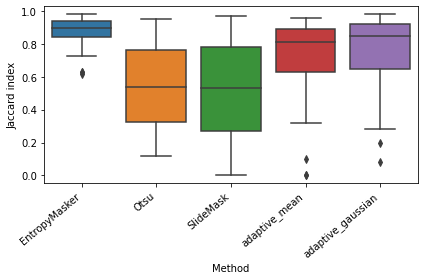

In [20]:
ax = sns.boxplot(x="Method", y="Jaccard index", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.savefig('/Users/ys2af/Writing lab/entropy method/boxplot_iou.pdf', dpi=300)
plt.show()
#plt.savefig('/Users/ys2af/Writing lab/entropy method/boxplot_iou.png', dpi=300)